Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering (scree plot or elbow curve) and 
obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data
(class column we have ignored at the begining who shows it has 3 clusters)df

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
data.shape

(178, 14)

In [7]:
data.Type.unique()

array([1, 2, 3], dtype=int64)

In [8]:
data.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [9]:
data['ID'] = range(1, 179, 1)
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177


In [11]:
data = data.drop('Type',axis=1)
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5


In [12]:
data.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,89.500000
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,51.528309
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,45.250000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,89.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,133.750000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,178.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
 13  ID               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [14]:
data.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
ID                 0
dtype: int64

In [15]:
data.skew()

Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
ID                 0.000000
dtype: float64

# Exploratory Data Analysis

Plotting the histogram for all features-
to Check the kind of each feature distribution
to Check data symmetry
to Verify features frequency
to Identify outliers

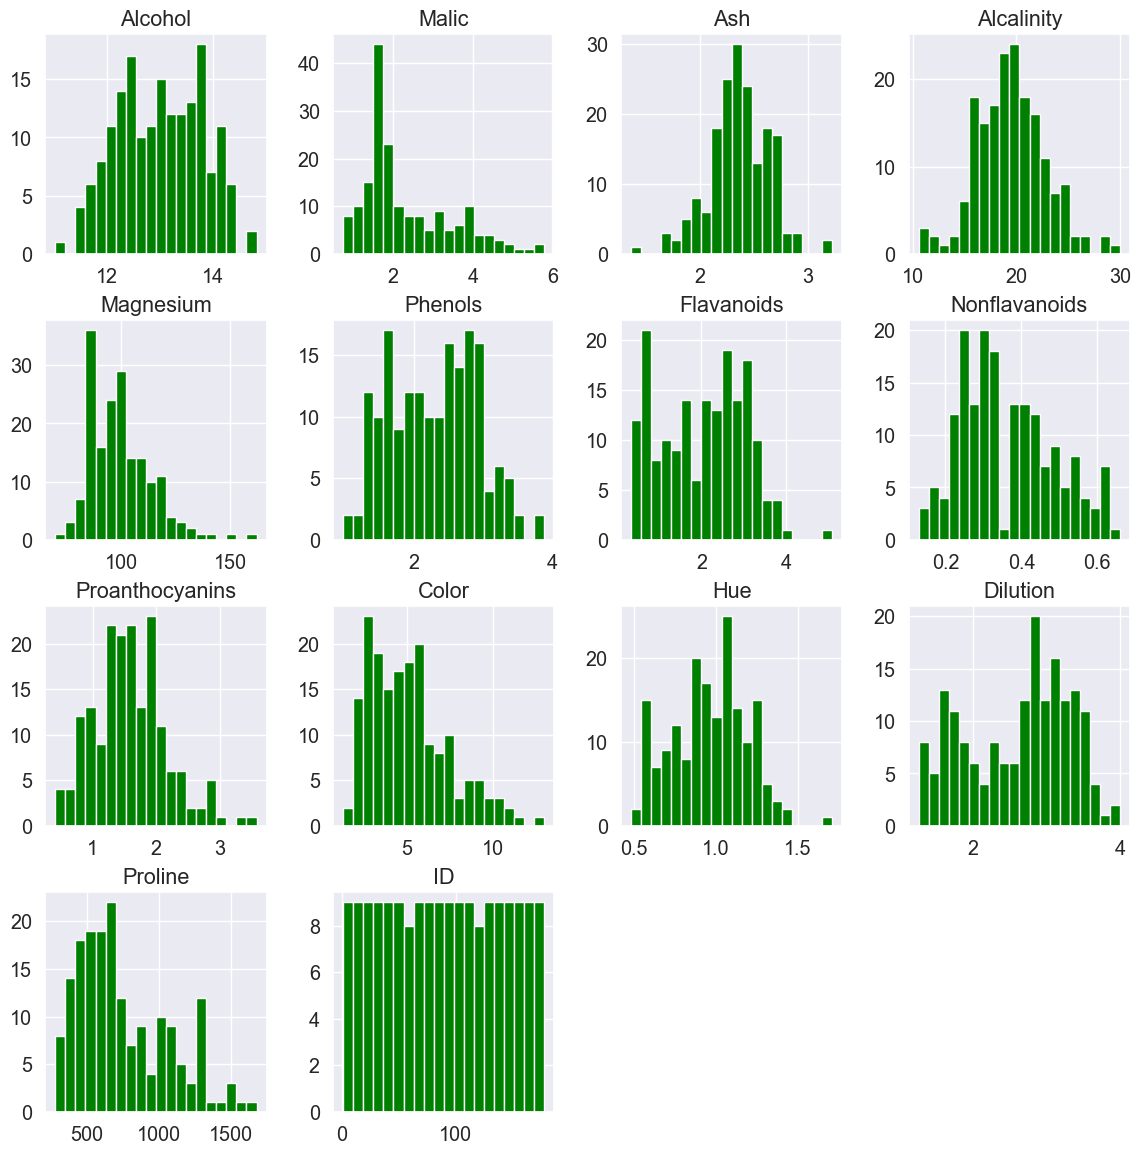

In [17]:
sns.set(style= 'dark', font_scale= 1.3, rc= {'figure.figsize':(14,14)})
ax = data.hist(bins= 20, color= 'green')

###  Outliers Detection

In [18]:
data.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'ID'],
      dtype='object')

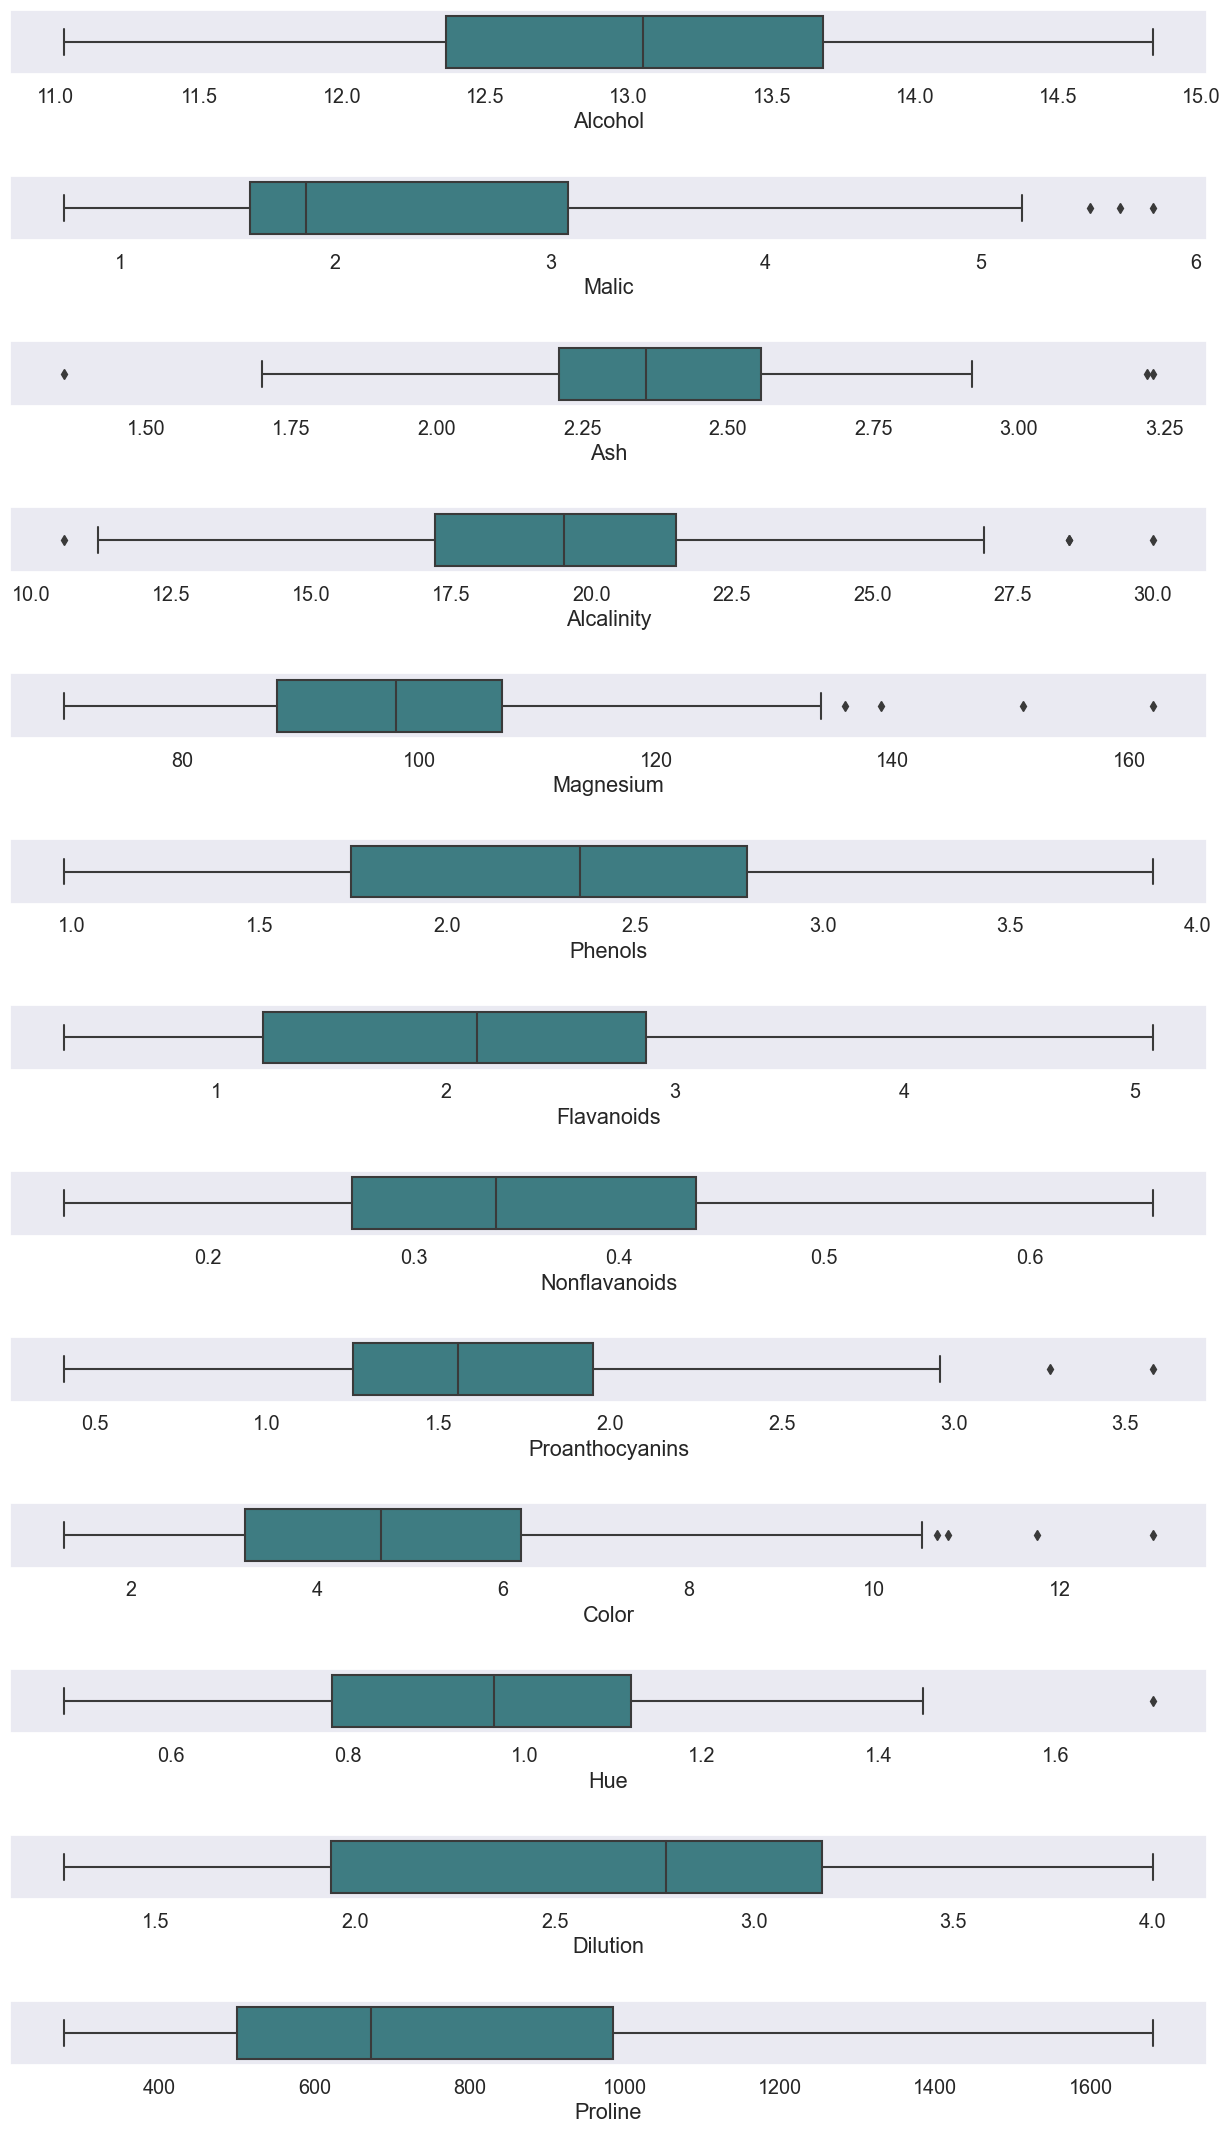

In [19]:
outlier = data.copy() 
fig, axes=plt.subplots(13,1, figsize=(13,22),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=outlier,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=outlier,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=outlier,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=outlier,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)

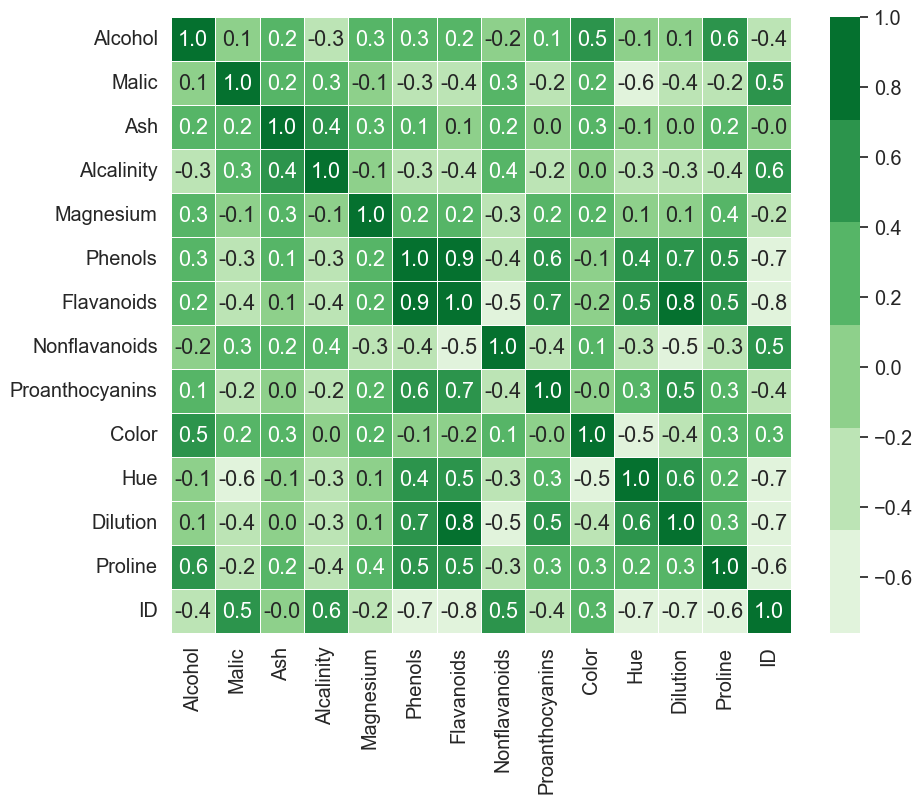

In [26]:
# Correlation Heatmap
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax,cmap=sns.color_palette("Greens"))
plt.show()

### From heatmap, we can see:
* Phenols is positively correlated with Flavanoids, Dilution and Proanthocyanins
* Flavanoids is positively correlated with Proanthocyanins and Dilution
* Dilution is positively correlated with Hue
* Alcohol is positively correlated with Proline
* Flavanoids is negatively correlated with ID

### Plotting frequent flying Phenols vs. Flavanoids  

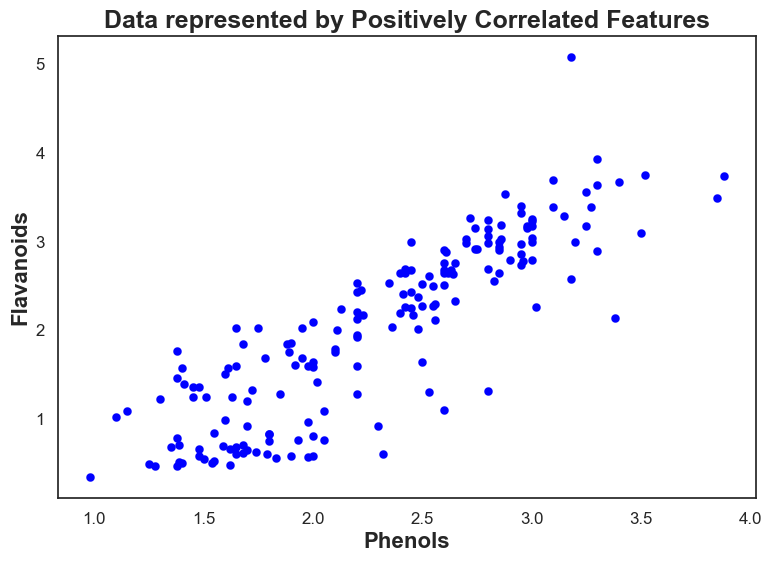

In [27]:
sns.set(style='white', rc= {'figure.figsize':(9,6)}, font_scale=1.1)
plt.scatter(x= data['Phenols'], y= data['Flavanoids'], color='blue', lw=0.1)
plt.xlabel('Phenols',fontweight='bold', fontsize=16)
plt.ylabel('Flavanoids',fontweight='bold', fontsize=16)
plt.title('Data represented by Positively Correlated Features',fontweight='bold',fontsize= 18)
plt.show()

##  Data Preprocessing

In [28]:
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5


In [29]:
wine_df = data.set_index('ID')
wine_df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
ID,,,,,,,,,,,,,
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


###  Applying Standard Scaler on the Data

In [30]:
standard_scaler = StandardScaler()
std_wine = standard_scaler.fit_transform(data)
std_wine.shape

(178, 14)

###  Applying MinMax Scaler on Dataset

In [31]:
minmax = MinMaxScaler()

norm_wine = minmax.fit_transform(data)
norm_wine.shape

(178, 14)

##  PCA (Principal Component Analysis)
###  PCA on Standard Scaled Dataset

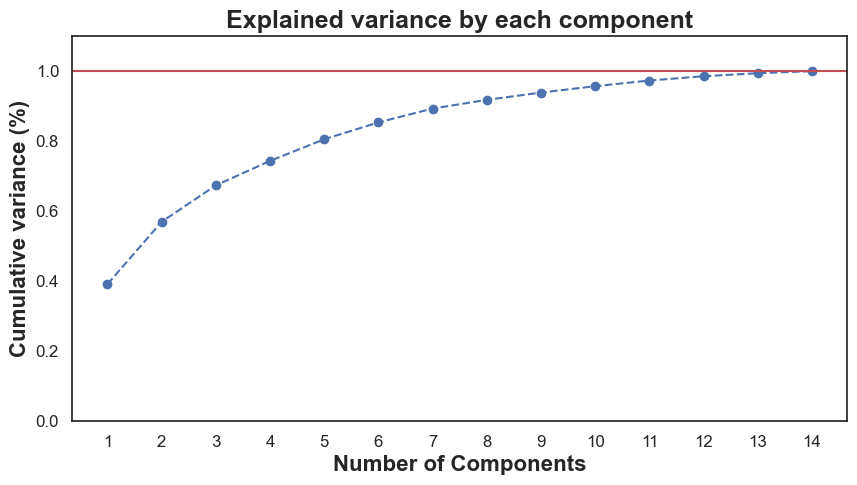

In [32]:
pca_var = PCA()
pca_var.fit(std_wine)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1 + std_wine.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components',fontweight='bold', fontsize=16)
plt.xticks(np.arange(1, 1+std_wine.shape[1], step=1))
plt.ylabel('Cumulative variance (%)',fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [33]:
# To find variance explained by each PCA 
var = pca_var.explained_variance_ratio_
var

array([0.39129819, 0.17835849, 0.10392085, 0.06990396, 0.06183992,
       0.04819035, 0.03948381, 0.02490743, 0.02078919, 0.01822808,
       0.01621756, 0.01222483, 0.00864803, 0.0059893 ])

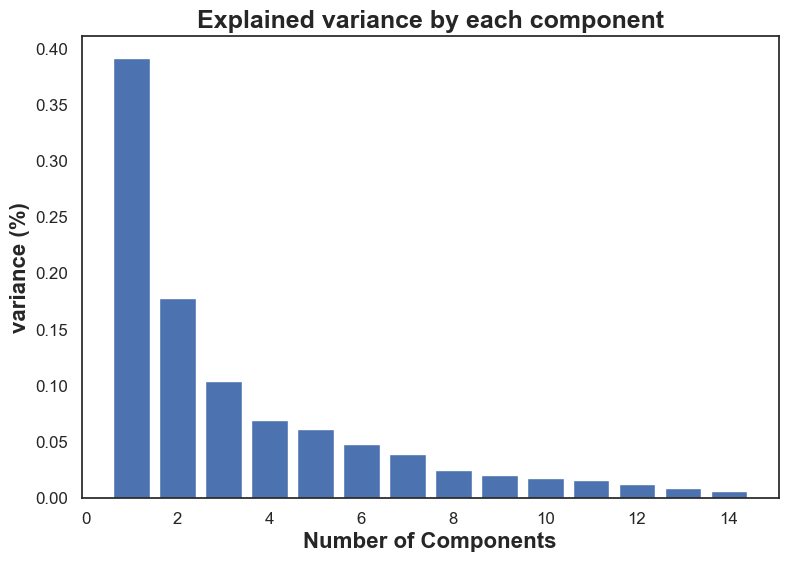

In [34]:
plt.bar(range(1, len(var) + 1), var)
plt.xlabel('Number of Components', fontweight='bold', fontsize=16)
plt.ylabel('variance (%)', fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.show()

### Cumulative Variance

In [35]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.13, 56.97, 67.36, 74.35, 80.53, 85.35, 89.3 , 91.79, 93.87,
       95.69, 97.31, 98.53, 99.39, 99.99])

In [36]:
pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_wine)

# Convert to data frame
pca_std_wine = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_std_wine.shape)
pca_std_wine.head()

(178, 3)


,PC1,PC2,PC3
0,3.723816,-1.447476,-0.153274
1,2.734987,0.334166,-2.079717
2,2.944840,-1.033583,0.979570
3,4.094144,-2.762344,-0.123541
4,1.550429,-0.867267,1.915570


### PCA plot in 2D

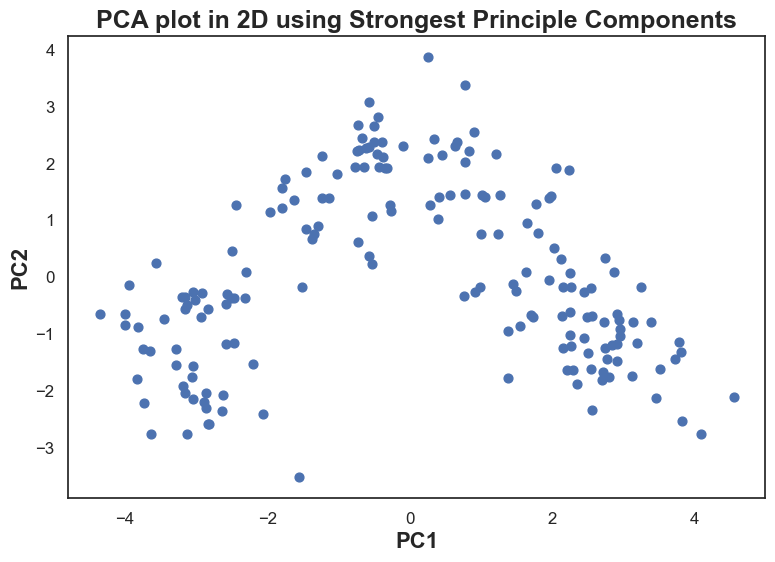

In [37]:
plt.figure(figsize=(9,6))

# Scatterplot
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components',fontweight='bold',fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

### 6.2 PCA on MinMax Scaled Dataset

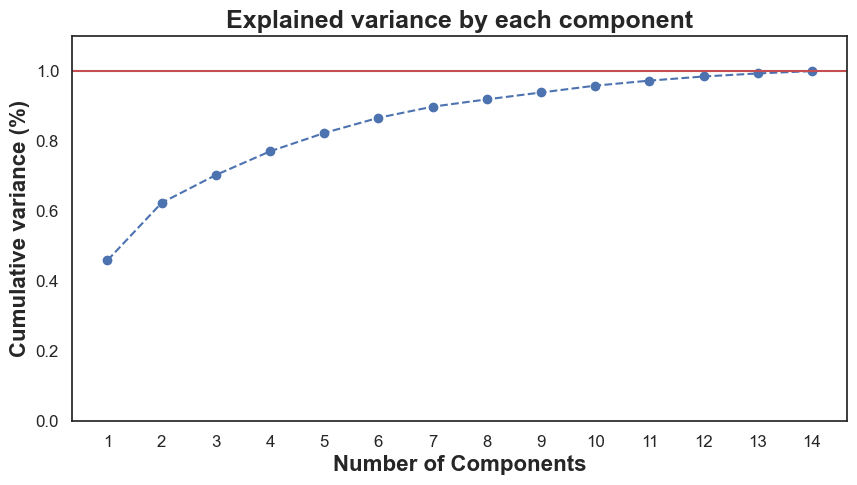

In [38]:
pca_var = PCA()
pca_var.fit(norm_wine)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1 + norm_wine.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components',fontweight='bold', fontsize=16)
plt.xticks(np.arange(1, 1 + norm_wine.shape[1], step=1))
plt.ylabel('Cumulative variance (%)',fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

### The amount of variance that each PCA explains is 

In [39]:
var = pca_var.explained_variance_ratio_
var

array([0.459506  , 0.16420046, 0.07951977, 0.06762289, 0.05235124,
       0.04342315, 0.03180871, 0.02082412, 0.01966956, 0.01951889,
       0.01435926, 0.01185743, 0.0086919 , 0.0066466 ])

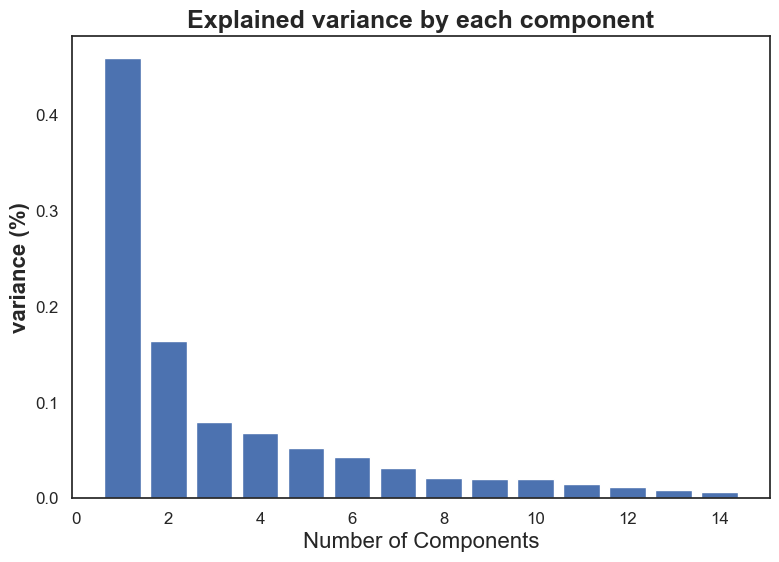

In [40]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components',fontsize=16)
plt.ylabel('variance (%)',fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.show()

### Cumulative Variance

In [41]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 45.95,  62.37,  70.32,  77.08,  82.32,  86.66,  89.84,  91.92,
        93.89,  95.84,  97.28,  98.47,  99.34, 100.  ])

In [42]:
pca = PCA(n_components=3)
pca_norm = pca.fit_transform(norm_wine)

# Convert to data frame
pca_norm_wine = pd.DataFrame(data = pca_norm, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_norm_wine.shape)
pca_norm_wine.head()

(178, 3)


,PC1,PC2,PC3
0,0.864955,-0.246505,0.012715
1,0.676158,-0.011751,-0.306279
2,0.692172,-0.186686,0.139093
3,0.955057,-0.568299,0.123337
4,0.411640,-0.067685,0.118278


#### The new columns are called Principal Components (PC's) and give the coordinates of the data in the new smaller space
### PCA plot in 2D

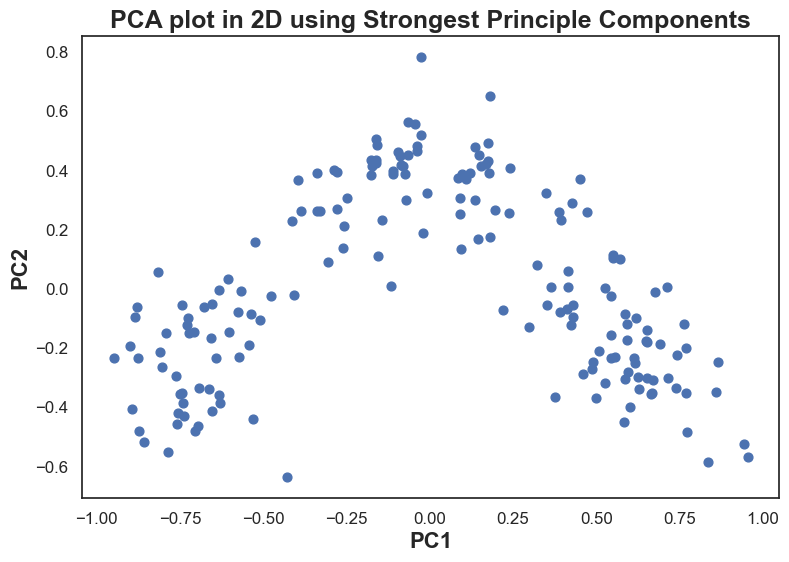

In [43]:
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], s=40)

plt.title('PCA plot in 2D using Strongest Principle Components',fontweight='bold',fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

#### Notes:
* Notice how these points have no colours (yet) because we don't know what their classes are. This is what makes it an unsupervised method.
* We know our dataset falls naturally into 3 classes (3 types of wine), so we assign colours by clustering the data into 3 groups using techniques such as k-Means and Hierarchical.

## KMeans Clustering
###  Elbow Method for Determining Cluster Amount on PCA Standard Scaled Dataset

In [44]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_wine)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:14<00:00,  1.76s/it]


In [45]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_wine)
    silhouette[i] = sil(pca_std_wine, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:14<00:00,  1.77s/it]


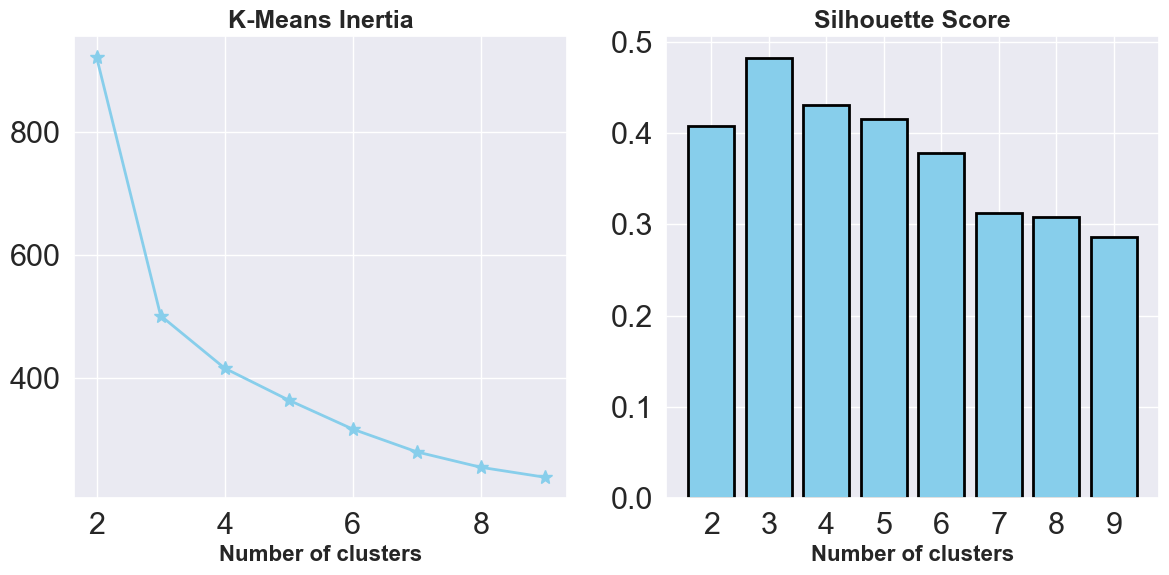

In [46]:
sns.set(style="darkgrid", rc={'figure.figsize':(14,6)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters", fontweight='bold', fontsize=16)
plt.title("K-Means Inertia", fontweight='bold', fontsize= 18)

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters",fontweight='bold', fontsize=16)
plt.title("Silhouette Score", fontweight='bold', fontsize= 18)
plt.show()

###  Silhouette Score

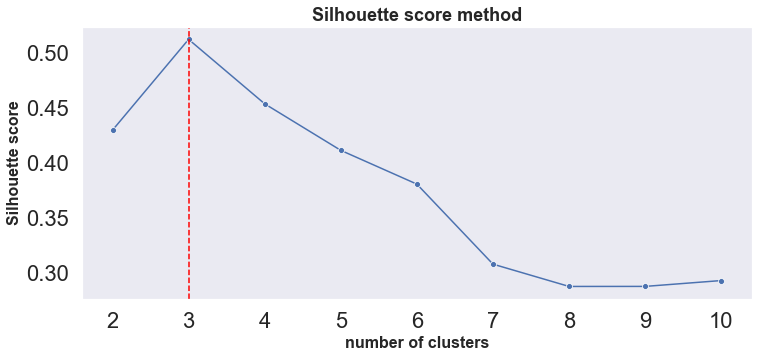

In [36]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_std_wine)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(pca_std_wine, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method
    
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method",fontweight='bold', fontsize=18)
ax.set_xlabel("number of clusters", fontweight='bold', fontsize=16)
ax.set_ylabel("Silhouette score", fontweight='bold', fontsize=16)
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

#### Silhouette score method indicates the best options would be respectively 3 clusters.

### As true labels are not known, we will use Silhouette Coefficient (Clustering performance evaluation) knee Elbow graph method
### Instantiate a scikit-learn K-Means model. we will check for two different hyperparameters value effect.

Elbow Plot for Standard Scaler data


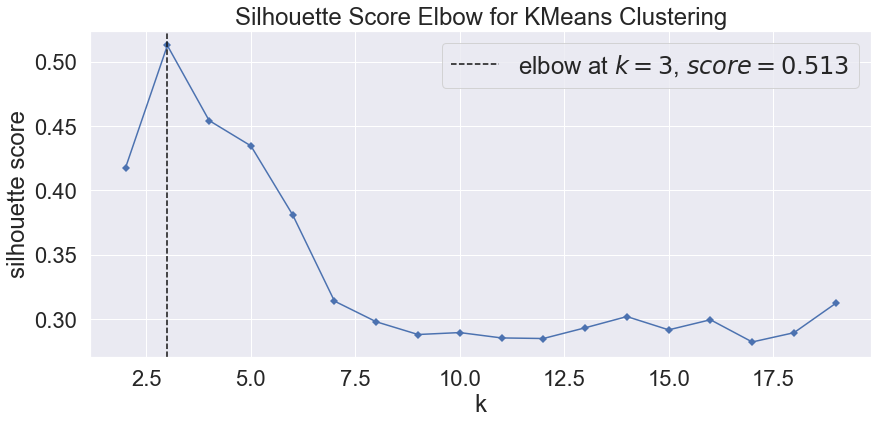

In [37]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(pca_std_wine)    
visualizer.show()
plt.show()

#### With the elbow method, the ideal number of clusters to use was 6.
#### We will also use the Silhouette score to determine an optimal number.

In [47]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_wine)
    sil_score1 = sil(pca_std_wine, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4081164133830491
For n_clusters = 3 The average silhouette_score is : 0.4817835370724267
For n_clusters = 4 The average silhouette_score is : 0.43109240818432953
For n_clusters = 5 The average silhouette_score is : 0.374440728521558
For n_clusters = 6 The average silhouette_score is : 0.37509406973271336
For n_clusters = 7 The average silhouette_score is : 0.29977673809110805
For n_clusters = 8 The average silhouette_score is : 0.299551515616359
For n_clusters = 9 The average silhouette_score is : 0.2914359055063996


### Conclusion:
According the the silhouette score of:

The standardized data, the ideal number of clusters is 3, with a score higher than other options, of 0.51

###  Build KMeans Cluster algorithm using K=3 and PCA on Standard Scaler Applied Dataset
#### We have found good number of cluster = 3
#### Model building using cluster numbers = 3

In [48]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_std_wine)
y_predict_kmeans.shape

(178,)

In [49]:
y_predict_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [50]:
model_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [51]:
model_kmeans.cluster_centers_

array([[ 2.55325354, -0.9460415 , -0.08278602],
       [-0.08562687,  1.72743604,  0.24903744],
       [-3.00022931, -1.16059366, -0.23271123]])

Within-cluster sum of squared

The lower values of inertia are better and zero is optimal.

Inertia is the sum of squared error for each cluster. 

Therefore the smaller the inertia the denser the cluster (closer together all the points are)

In [52]:
model_kmeans.inertia_

501.17482400537733

### Assign clusters to the data set

In [53]:
wine_df['Kmeans_Label'] = model_kmeans.labels_

### Group data by Clusters (K=6)

In [54]:
wine_df.groupby('Kmeans_Label').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,
0,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.28918,1.922951,5.444590,1.067705,3.154754,1110.639344
1,12.246418,1.891642,2.242985,20.140299,93.238806,2.258209,2.085672,0.36194,1.612836,3.059701,1.059493,2.798507,508.597015
2,13.144000,3.346200,2.425600,21.330000,98.640000,1.677200,0.807000,0.45040,1.156400,7.264400,0.686200,1.698800,622.440000


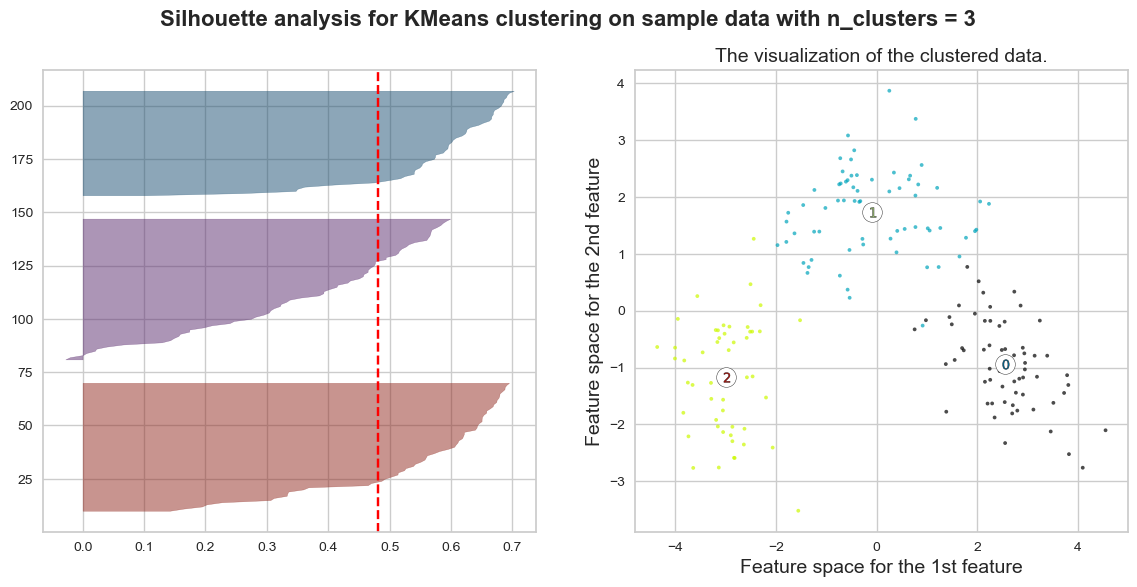

In [59]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(14,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72'])
sil_visualizer1.fit(pca_std_wine)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 3) # 3 is number of clusters
ax2.scatter(pca_std_wine.iloc[:, 0], pca_std_wine.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.", fontsize=14)
ax2.set_xlabel("Feature space for the 1st feature", fontsize=14)
ax2.set_ylabel("Feature space for the 2nd feature", fontsize=14)
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 3),fontsize=16, fontweight='bold')

plt.show()

###  Elbow Method and Silhouette Score on PCA MinMaxScaler Applied Data

In [60]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_norm_wine)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:14<00:00,  1.76s/it]


In [61]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_norm_wine)
    silhouette[i] = sil(pca_norm_wine, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:15<00:00,  1.92s/it]


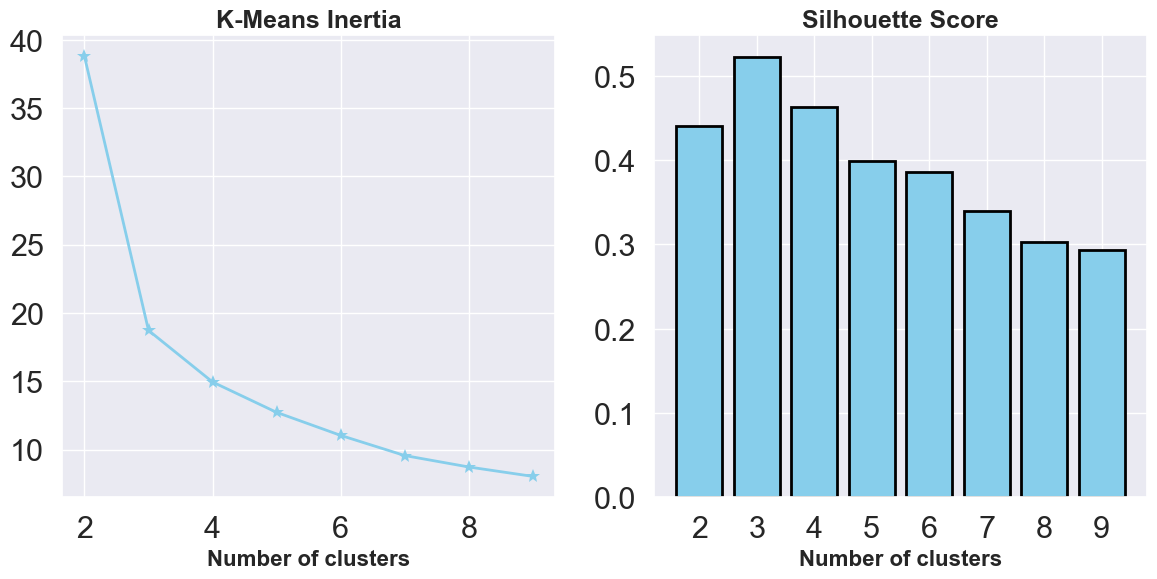

In [62]:
sns.set(style="darkgrid", rc={'figure.figsize':(14,6)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters",fontweight='bold', fontsize=16)
plt.title("K-Means Inertia", fontweight='bold', fontsize= 18)

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters", fontweight='bold', fontsize=16)
plt.title("Silhouette Score", fontweight='bold', fontsize= 18)
plt.show()

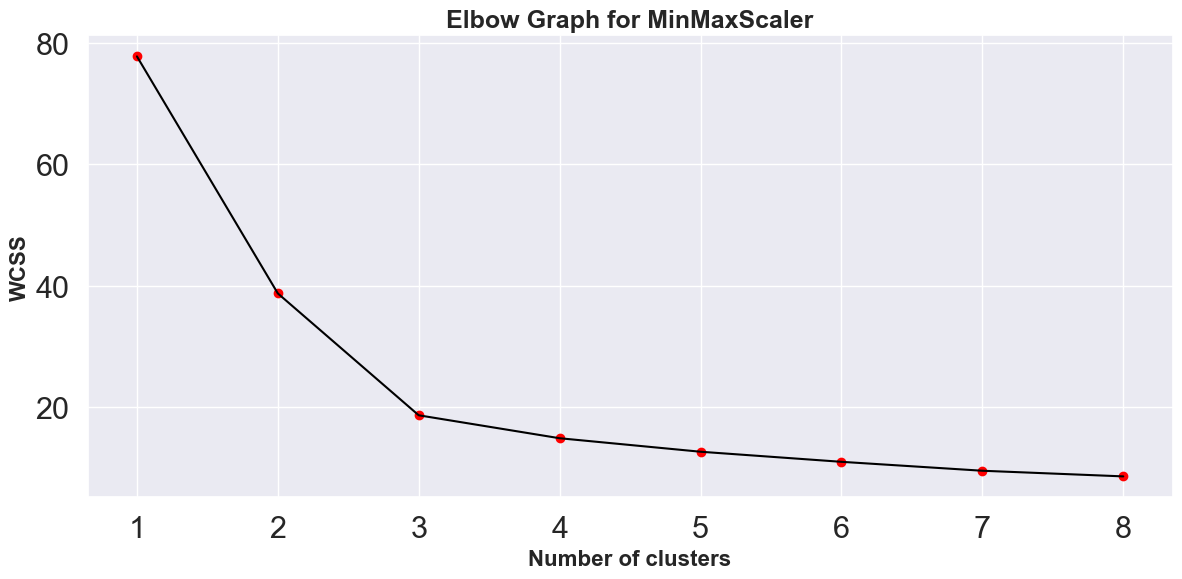

In [63]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(pca_norm_wine)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler', fontweight='bold', fontsize=18)
plt.xlabel('Number of clusters', fontweight='bold', fontsize=16)
plt.ylabel('WCSS',fontweight='bold', fontsize=16)
plt.show()

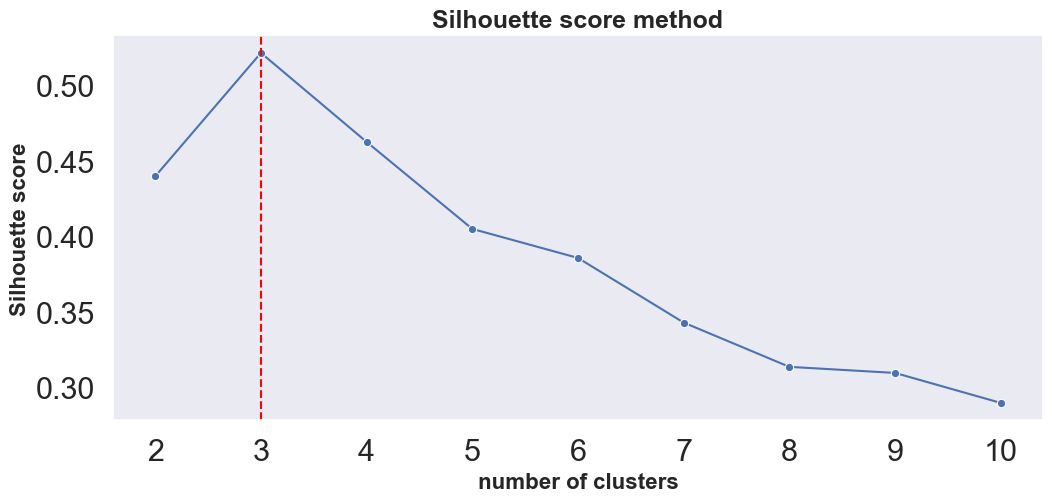

In [70]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_norm_wine)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(pca_norm_wine, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x= n_clusters,y= s_scores, marker='o',ax=ax)
ax.set_title("Silhouette score method", fontweight='bold', fontsize=18)
ax.set_xlabel("number of clusters", fontweight='bold', fontsize=16)
ax.set_ylabel("Silhouette score", fontweight='bold', fontsize=16)
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

### Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.

Elbow Plot for MinMaxScaler data


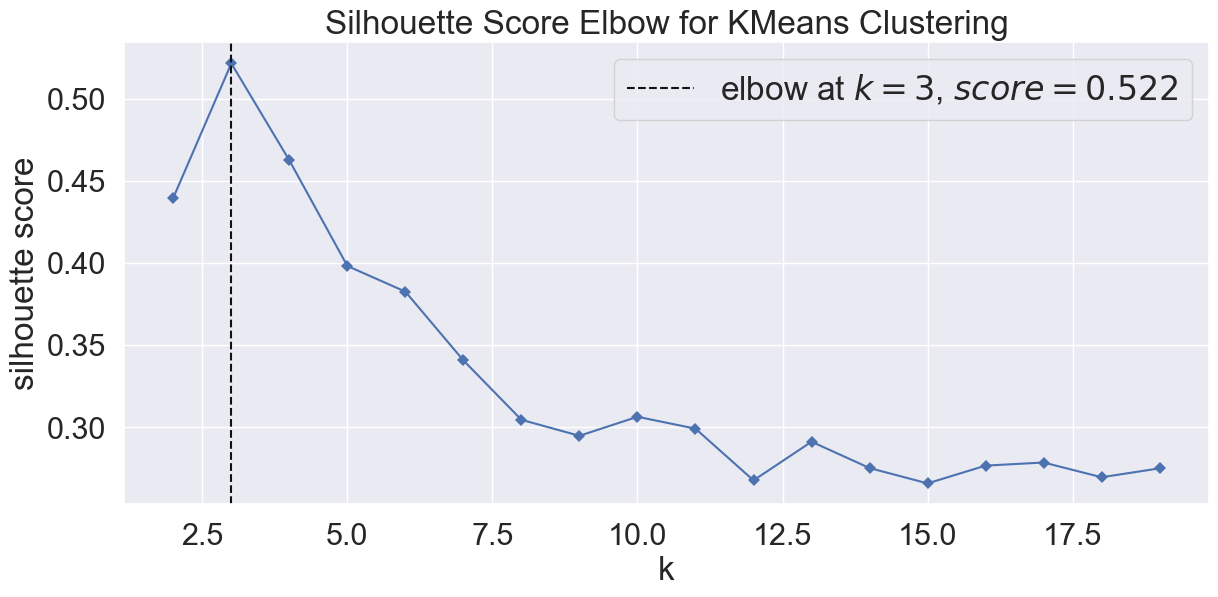

In [71]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(pca_norm_wine)    
visualizer.show()
plt.show()

#### With the elbow method, the ideal number of clusters to use was 6.
#### We will also use the Silhouette score to determine an optimal number.

In [72]:
clust_list = [2,3,4,5,6,7,8,9]
#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_norm_wine)
    sil_score1= sil(pca_norm_wine, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4397504158913884
For n_clusters = 3 The average silhouette_score is : 0.5215335527289146
For n_clusters = 4 The average silhouette_score is : 0.4625268425813935
For n_clusters = 5 The average silhouette_score is : 0.39825936654852967
For n_clusters = 6 The average silhouette_score is : 0.38561656382884785
For n_clusters = 7 The average silhouette_score is : 0.3427923839600768
For n_clusters = 8 The average silhouette_score is : 0.3200093126318457
For n_clusters = 9 The average silhouette_score is : 0.29805902398315326


#### Conclusion:
According the the silhouette score of:

* The PCA on MinMax Scaler Applied data, the ideal number of clusters is 3, with a score higher than other options, of 0.60, but if you notice the number of cluster 4 has also the best variation within cluster and between cluster with zero to no values going towards -1 and no overlapping in cluster segregation than the consecutive rest

* If we check silhouette score with PCA on Normalize data kmeans model 0.60>0.51 than of PCA on Standard Scaler Dataset.

* Best score always close to +1.

###  Build KMeans Cluster algorithm using K=3 and PCA on MinMaxScaler Applied Dataset
#### We have found good number of cluster = 3
#### Model building using cluster numbers = 3

In [73]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_norm_wine)
y_predict_kmeans.shape

(178,)

In [74]:
y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [75]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [76]:
model_kmeans.cluster_centers_

array([[-0.02383121,  0.35770859,  0.01239953],
       [-0.69579292, -0.23298991,  0.00190367],
       [ 0.58649203, -0.19289148, -0.01473472]])

Within-cluster sum of squared

The lower values of inertia are better and zero is optimal.

Inertia is the sum of squared error for each cluster. 

Therefore the smaller the inertia the denser the cluster(closer together all the points are)

In [77]:
model_kmeans.inertia_

18.717061925694473

### Assign clusters to the data set

In [78]:
wine_df['Kmeans_Label'] = model_kmeans.labels_

### Group data by Clusters (K=3)

In [79]:
wine_df.groupby('Kmeans_Label').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,
0,12.233333,1.905000,2.251212,20.218182,93.469697,2.247273,2.069091,0.363485,1.602727,3.025758,1.058576,2.792727,508.696970
1,13.144000,3.346200,2.425600,21.330000,98.640000,1.677200,0.807000,0.450400,1.156400,7.264400,0.686200,1.698800,622.440000
2,13.701774,1.981129,2.441613,17.245161,107.306452,2.844355,2.972581,0.288710,1.928710,5.442258,1.068548,3.155161,1100.822581


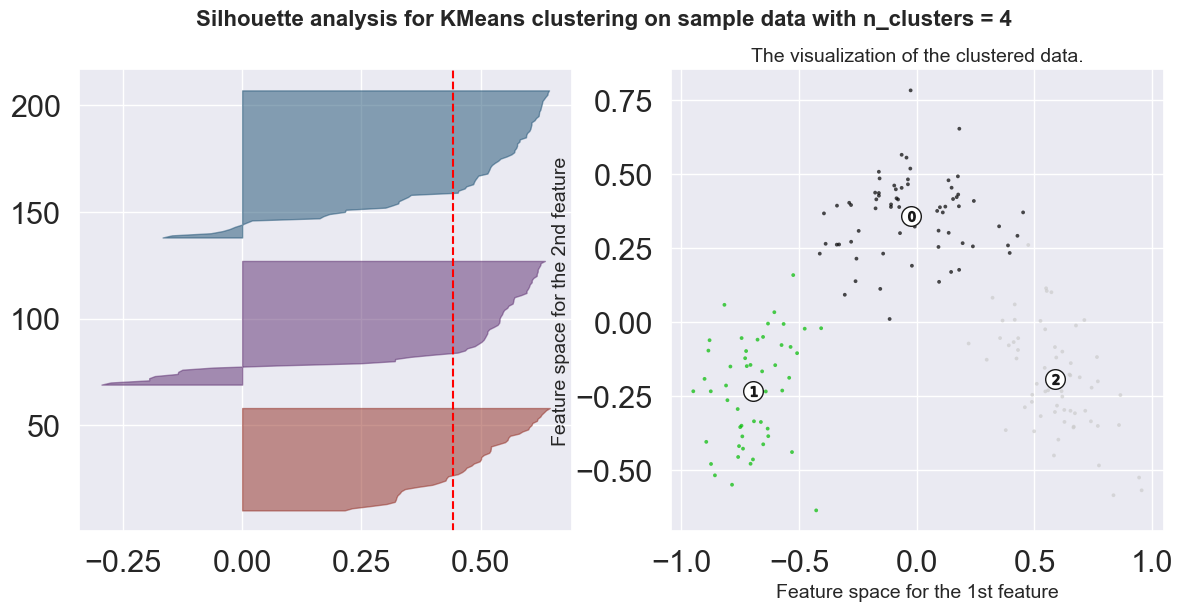

In [80]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(14,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72'])
sil_visualizer1.fit(pca_std_wine)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 3 is number of clusters
ax2.scatter(pca_norm_wine.iloc[:, 0],pca_norm_wine.iloc[:, 1],marker='.',s=30, lw=0,alpha=0.7,c=colors1,edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.", fontsize=14)
ax2.set_xlabel("Feature space for the 1st feature", fontsize=14)
ax2.set_ylabel("Feature space for the 2nd feature", fontsize=14)
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 4), fontsize=16, fontweight='bold')
#sil_visualizer1.show()
plt.show()

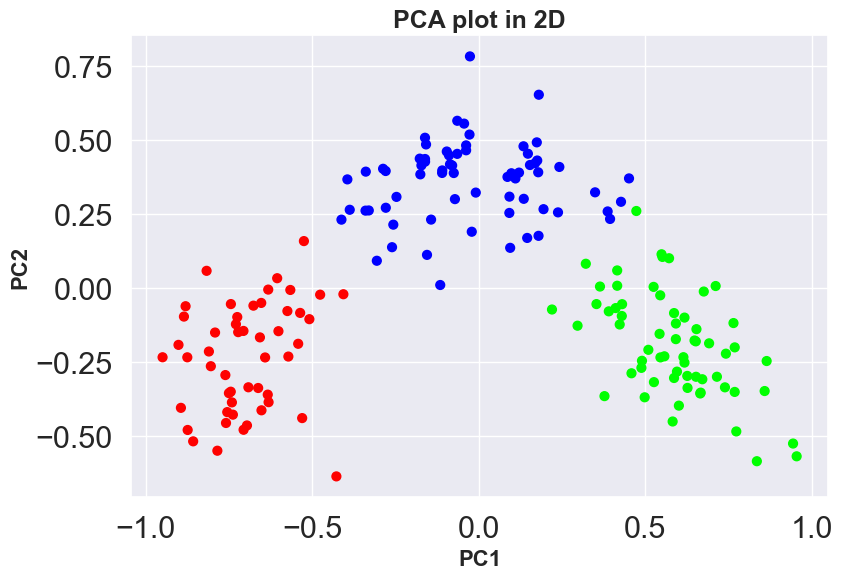

In [81]:
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_df['Kmeans_Label'], cmap="brg", s=40)

plt.title('PCA plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

### We can now clearly see the 3 number of clusters formed

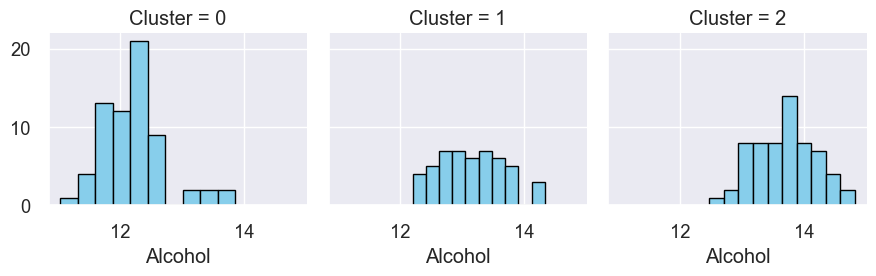

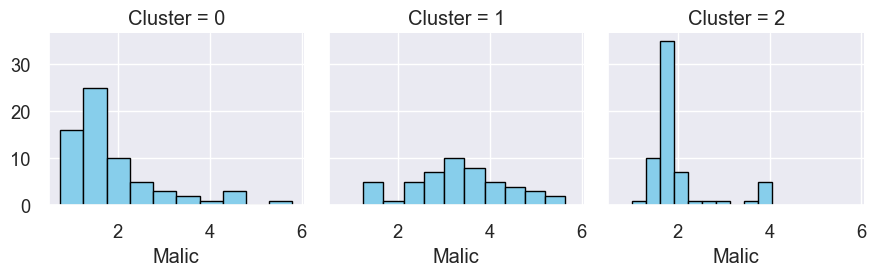

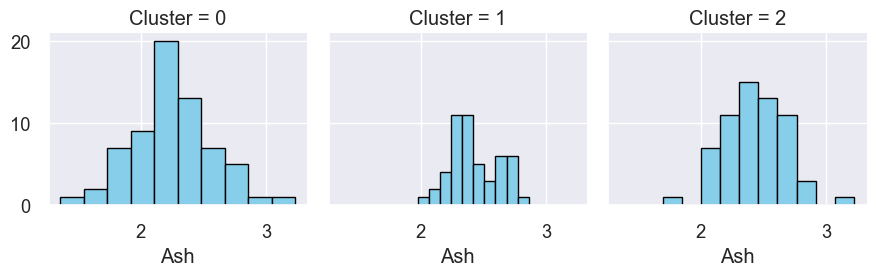

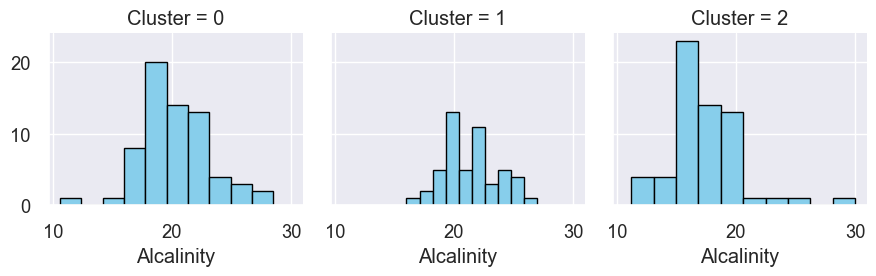

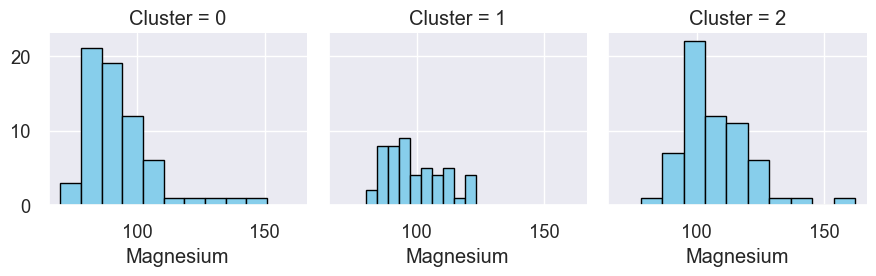

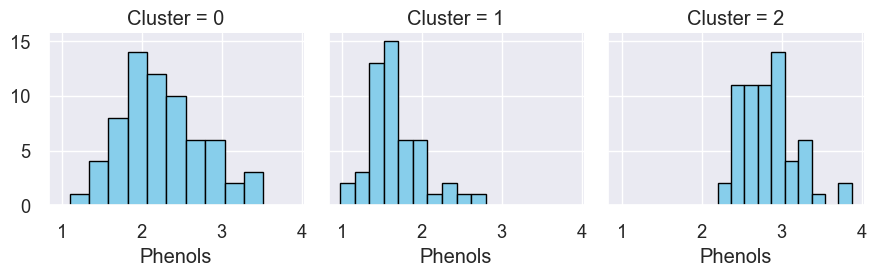

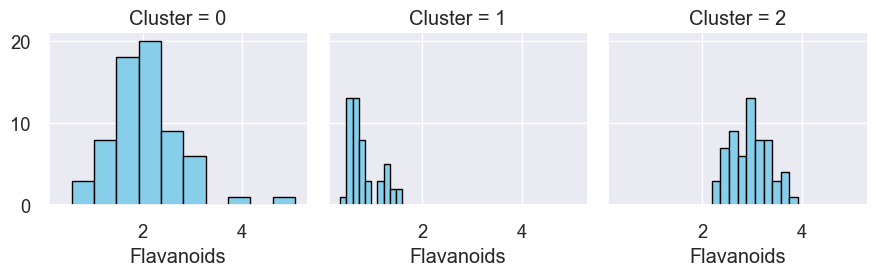

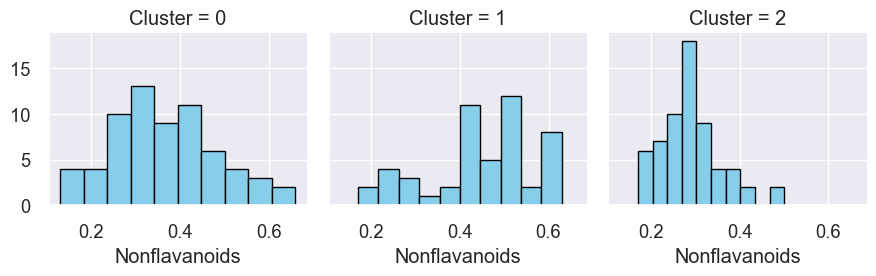

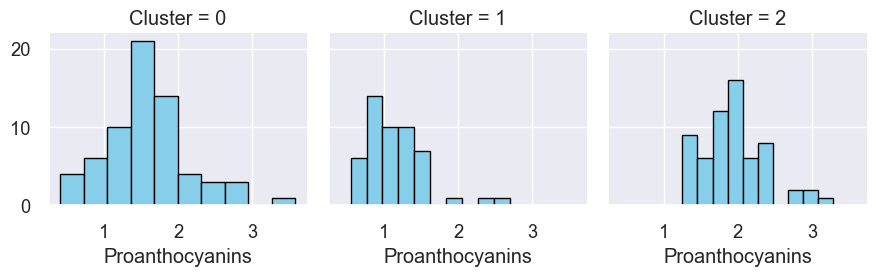

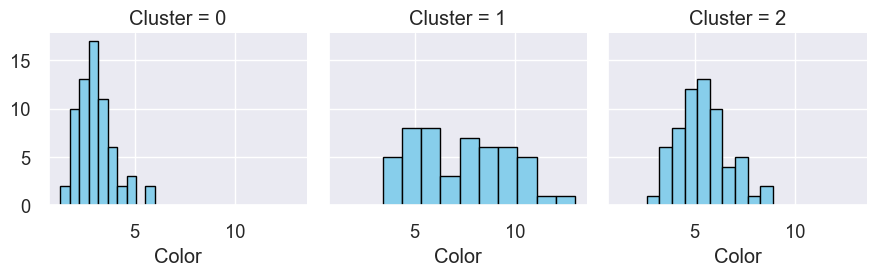

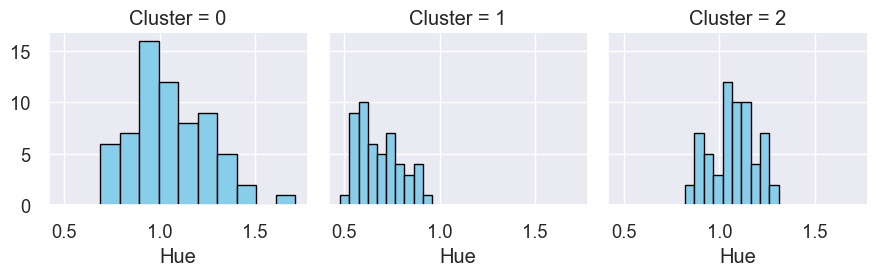

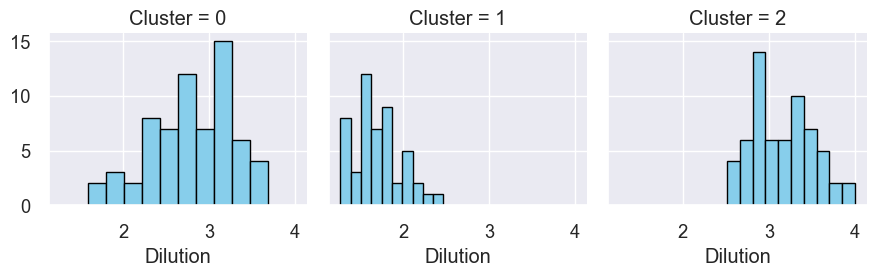

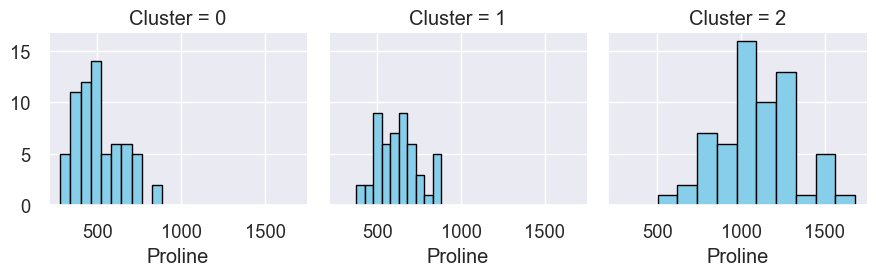

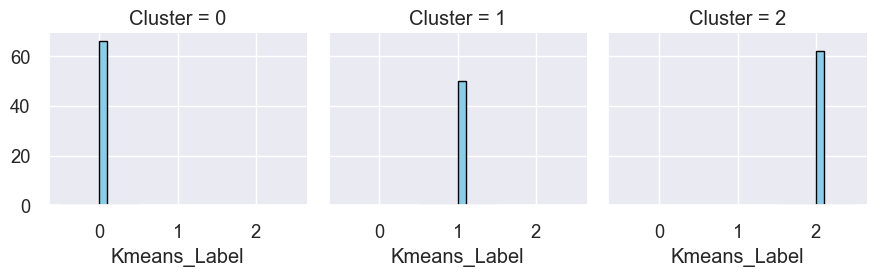

In [82]:
wine_df1 = wine_df.copy()
wine_df1['Cluster'] = model_kmeans.labels_

aux = wine_df1.columns.tolist()
aux[0:len(aux)-1]
sns.set(style="darkgrid", rc={'figure.figsize':(15,10)}, font_scale=1.2)

for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(wine_df1, col="Cluster")
    grid.map(plt.hist, cluster, color="skyblue", lw=1, edgecolor="black")

### Sorting elements based on cluster label assigned and taking average for insights.

In [83]:
cluster1 = pd.DataFrame(wine_df1.loc[wine_df1.Cluster==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(wine_df1.loc[wine_df1.Cluster==1].mean(),columns= ['Cluster2_Avg'])
cluster3 = pd.DataFrame(wine_df1.loc[wine_df1.Cluster==2].mean(),columns= ['Cluster2_Avg'])
avg_wine = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_wine

,Cluster1_Avg,Cluster2_Avg,Cluster2_Avg
Alcohol,12.233333,13.1440,13.701774
Malic,1.905000,3.3462,1.981129
Ash,2.251212,2.4256,2.441613
Alcalinity,20.218182,21.3300,17.245161
Magnesium,93.469697,98.6400,107.306452
Phenols,2.247273,1.6772,2.844355
Flavanoids,2.069091,0.8070,2.972581
Nonflavanoids,0.363485,0.4504,0.288710
Proanthocyanins,1.602727,1.1564,1.928710
Color,3.025758,7.2644,5.442258


###  Comparing Kmeans Clusters with the Original Classified Dataset using "Type" Feature

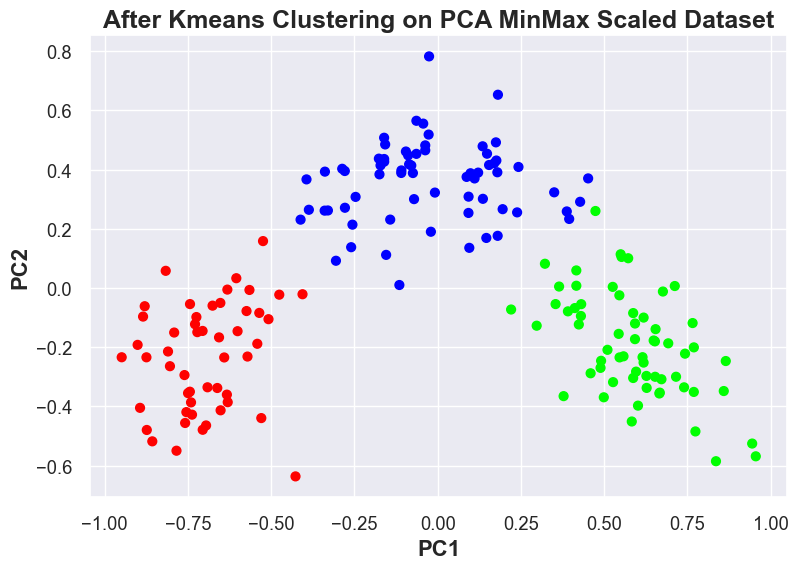

NameError: name 'wine_data' is not defined

<Figure size 900x600 with 0 Axes>

In [84]:
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_df['Kmeans_Label'], cmap="brg", s=40)
plt.title('After Kmeans Clustering on PCA MinMax Scaled Dataset',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_data['Type'], cmap="brg", s=40)
plt.title('Original Classification without Kmeans CLustering',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

### Group data by Clusters (K=3)

In [86]:
display('After Applying PCA and Kmens CLustering on Dataset',wine_df.groupby('Kmeans_Label').agg(['mean']),'Original Classified Dataset',data.groupby('ID').agg(['mean']))

'After Applying PCA and Kmens CLustering on Dataset'

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,
0,12.233333,1.905000,2.251212,20.218182,93.469697,2.247273,2.069091,0.363485,1.602727,3.025758,1.058576,2.792727,508.696970
1,13.144000,3.346200,2.425600,21.330000,98.640000,1.677200,0.807000,0.450400,1.156400,7.264400,0.686200,1.698800,622.440000
2,13.701774,1.981129,2.441613,17.245161,107.306452,2.844355,2.972581,0.288710,1.928710,5.442258,1.068548,3.155161,1100.822581


'Original Classified Dataset'

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ID,,,,,,,,,,,,,
1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
2,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
3,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
4,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
5,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
175,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0


#### Observation:
* The Type 2 has been perfectly clustered and rest has negliglable amount of difference
* We have perfectly clustered the data into Three Types as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column

### t-SNE

In [87]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(norm_wine)

tsne_df = pd.DataFrame(data = X_tsne, columns = ['t-SNE Comp. 1', 't-SNE Comp. 2'])

print(tsne_df.shape)
tsne_df.head()

(178, 2)


,t-SNE Comp. 1,t-SNE Comp. 2
0,-0.091922,-14.101474
1,1.199266,-9.536504
2,5.638799,-13.374560
3,3.645853,-15.560617
4,5.226166,-9.154743


### t-SNE plot in 2D coloured by class
Like PCA, t-SNE is an unsupervised algorithm, however we will use the same k-Means clusters from before to colour code the data points.

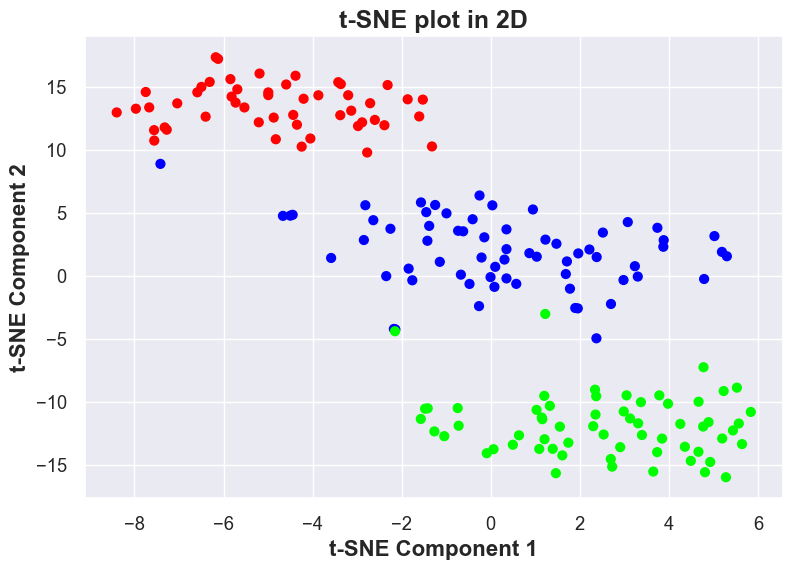

In [88]:
plt.figure(figsize=(9,6))
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c= wine_df['Kmeans_Label'], cmap="brg", s=40)

plt.title('t-SNE plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('t-SNE Component 1', fontweight='bold', fontsize=16)
plt.ylabel('t-SNE Component 2', fontweight='bold', fontsize=16)
plt.show()

##  Hierarchical Clustering Algorithm
### Dendogram on PCA MinMaxScaler Applied Dataset

Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.

Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 

Ward method is commanly used since it is simpler to visualize understanding.

Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

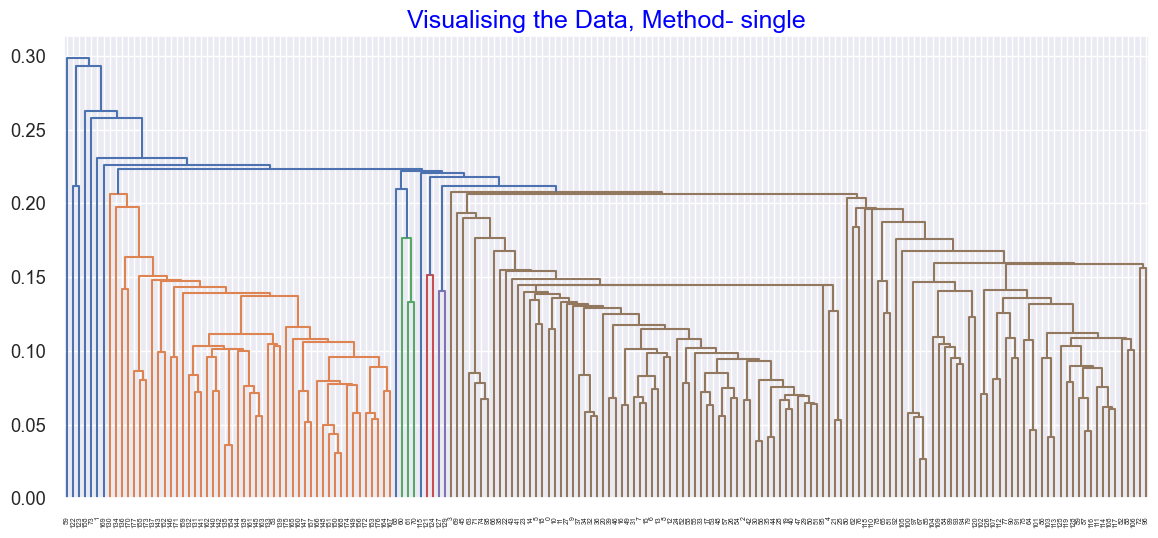

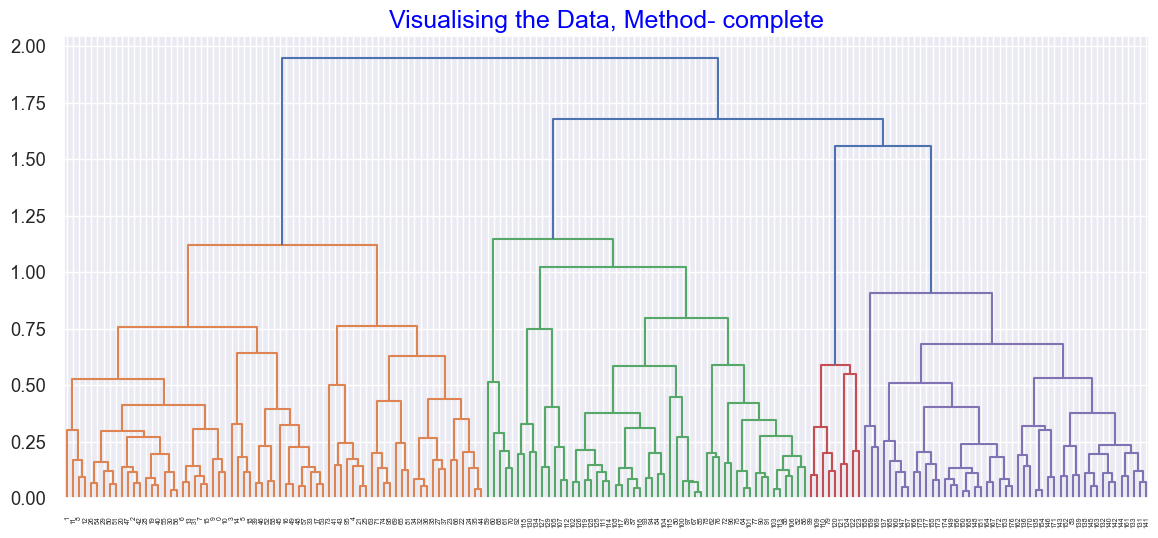

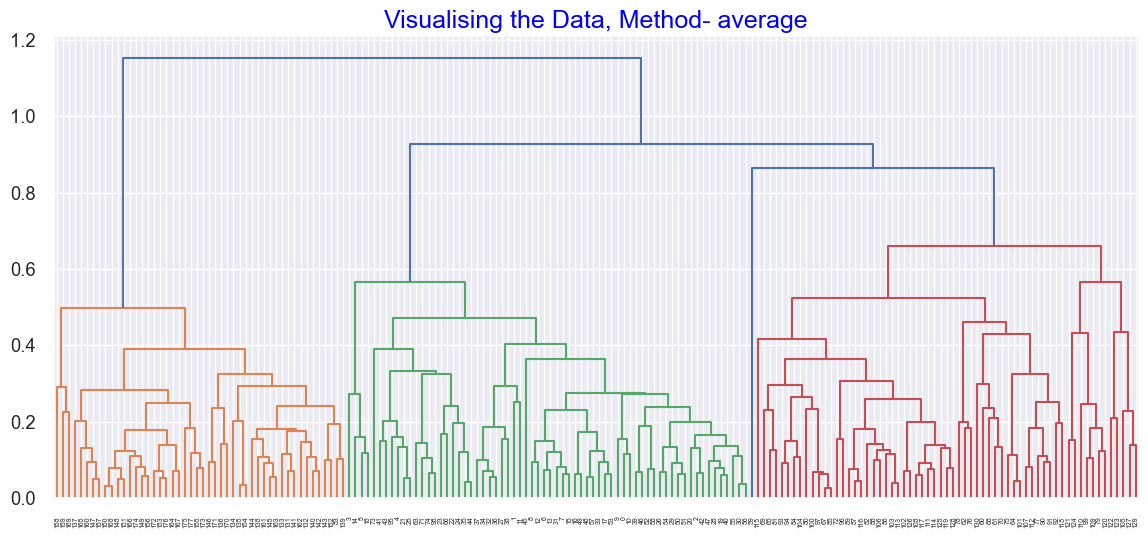

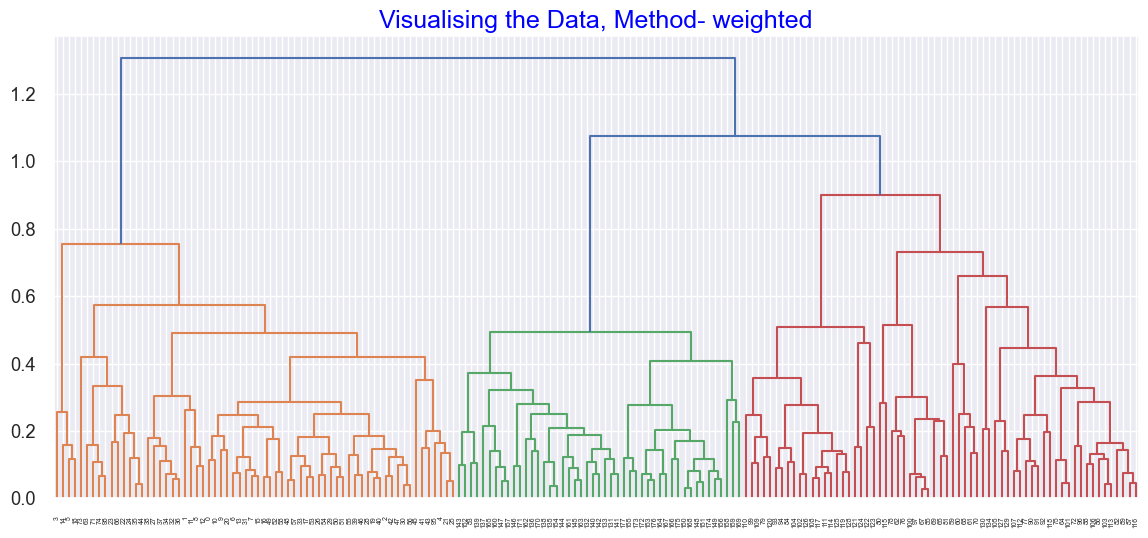

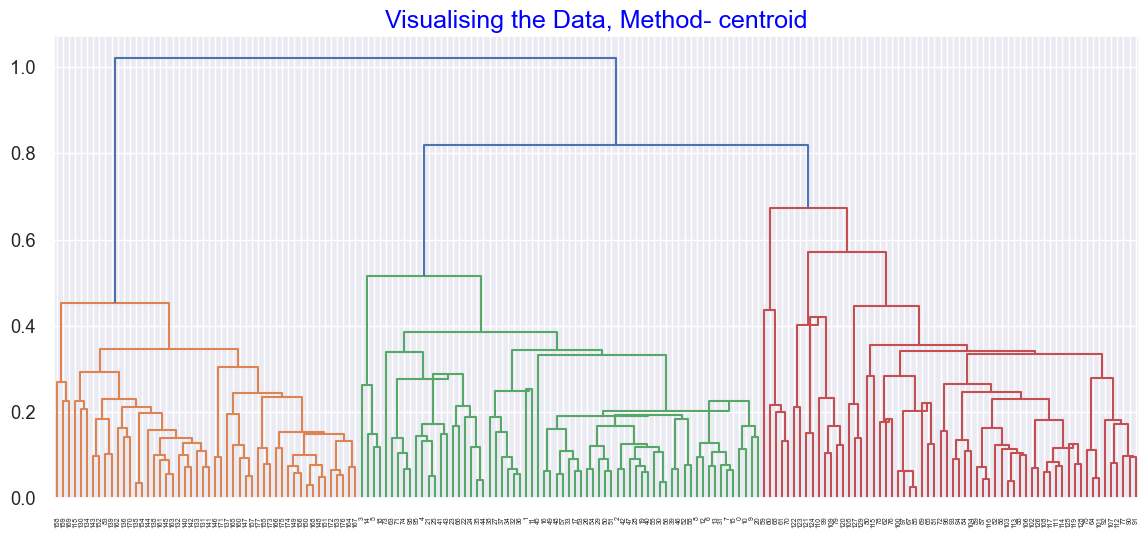

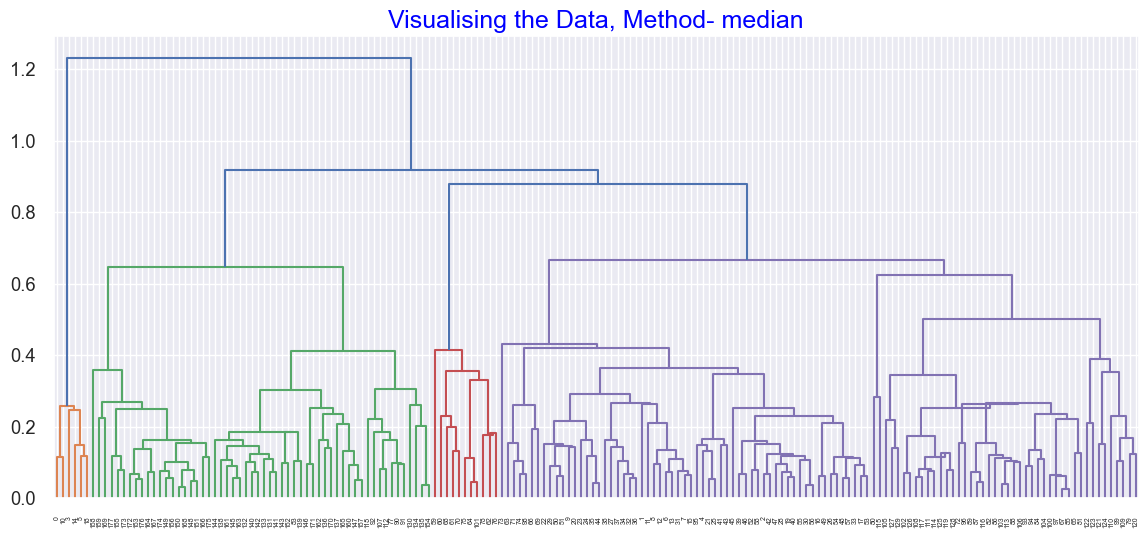

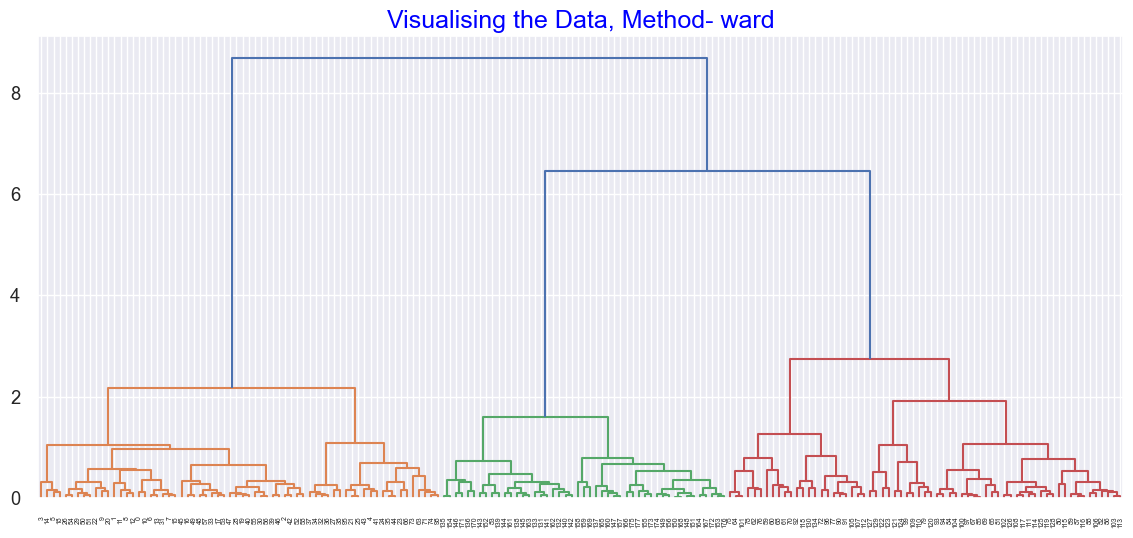

In [89]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6)) 
    
    dict = {'fontsize':18,'fontweight' :16, 'color' : 'blue'}  
    plt.title('Visualising the Data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_norm_wine, method = methods,optimal_ordering=False))

### Silhouette Score method for PCA MinMax Scaled Data
###  Applying Different Linkages using Euclidean Method for distance Calculation

In [90]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_norm_wine)
        silhouette_score1 = sil(pca_norm_wine, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.44369351506555055
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4448273929121035
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4598802263684806
For n_clusters = 2 The average silhouette_score with linkage- single : 0.19347387677878175

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.512478461893362
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.45525090342803276
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5163908228025497
For n_clusters = 3 The average silhouette_score with linkage- single : -0.0044664888186661325

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.4562664176188692
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4681313801022474
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4840694941767872

###  Applying Different Linkages using Different Distance Methods

In [91]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages) # by default it takes linkage 'ward'
            hie_labels1 = hie_cluster1.fit_predict(pca_norm_wine)
            silhouette_score1 = sil(pca_norm_wine, hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.4448273929121035
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.21595497316869963
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.4448273929121035
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.21595497316869963
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.4448273929121035

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.4598802263684806
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.4545020334169387
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.4598802263684806
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.45450

### The seperation in each Linkages and Distance Methods indicate that 3 is the optimal number for clusters.
* For n_clusters = 3 The average silhouette_score with linkage- average and Affinity- l2 : 0.6015
* For n_clusters = 3 The average silhouette_score with linkage- ward : 0.6015

### Dendrogram on Standard Scaler Applied on Data

Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.

Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 

Ward method is commanly used since it is simpler to visualize understanding.

Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

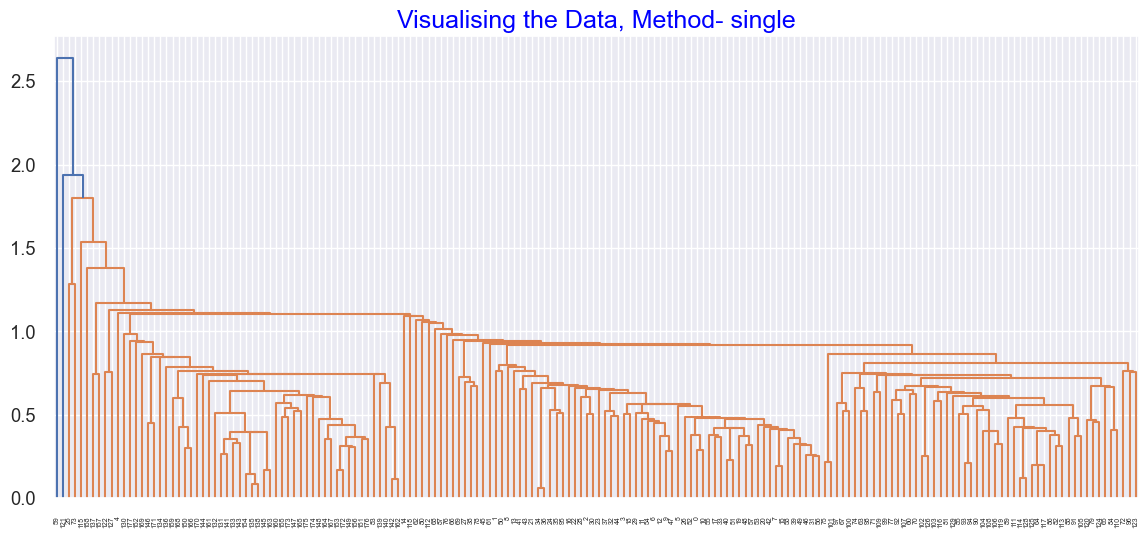

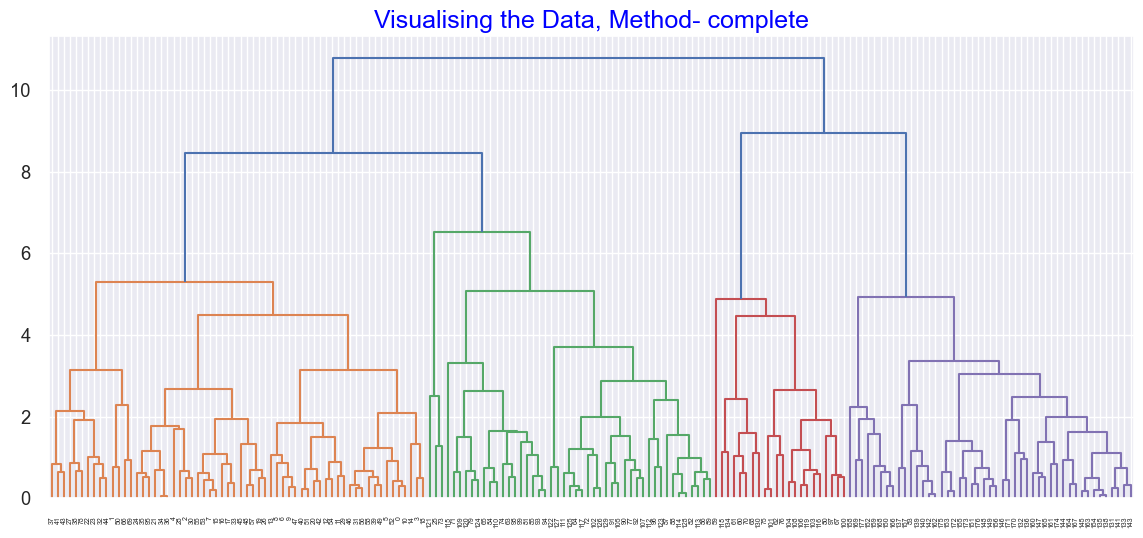

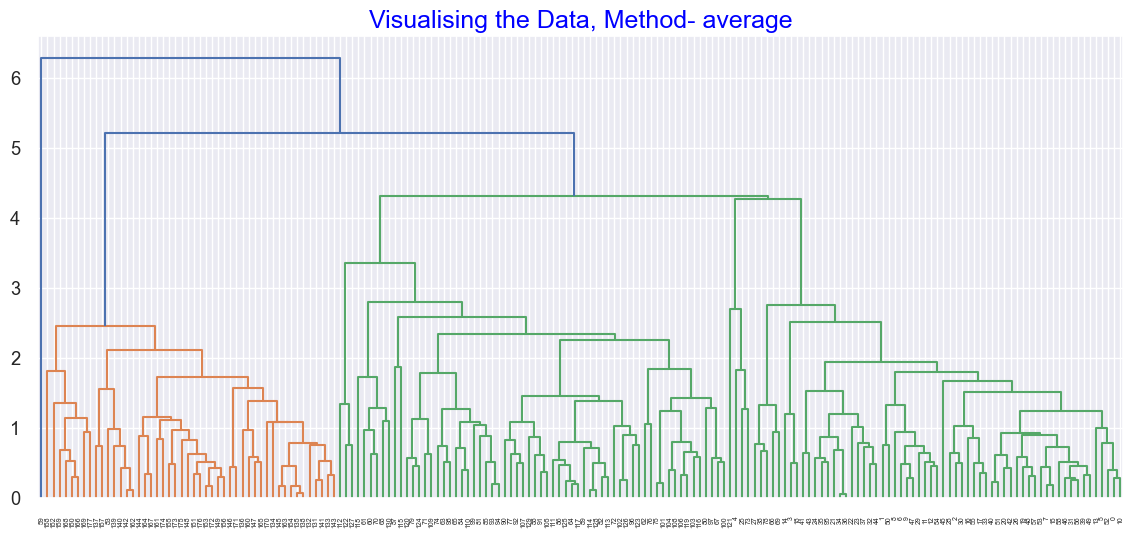

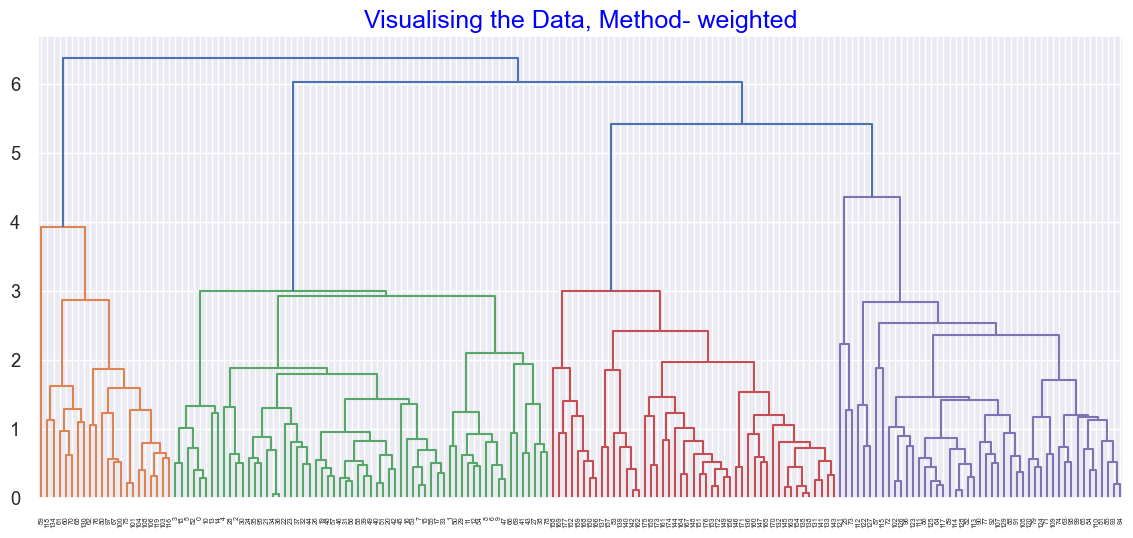

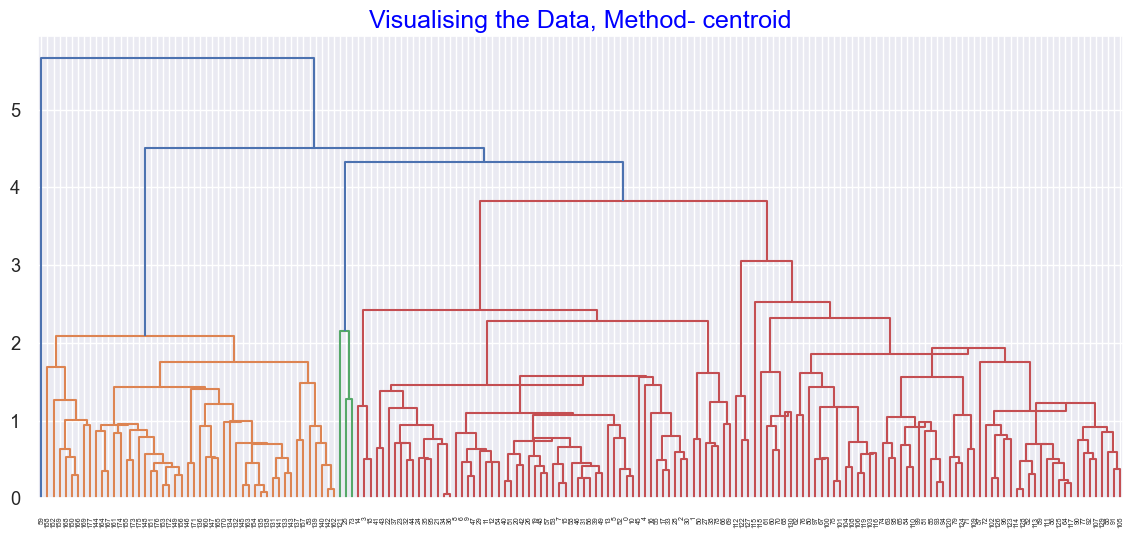

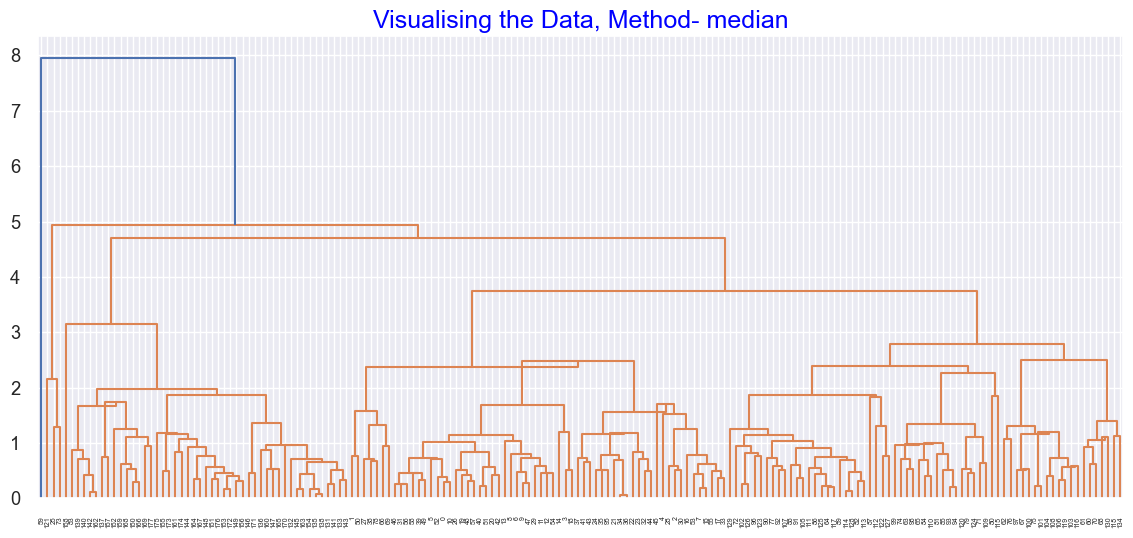

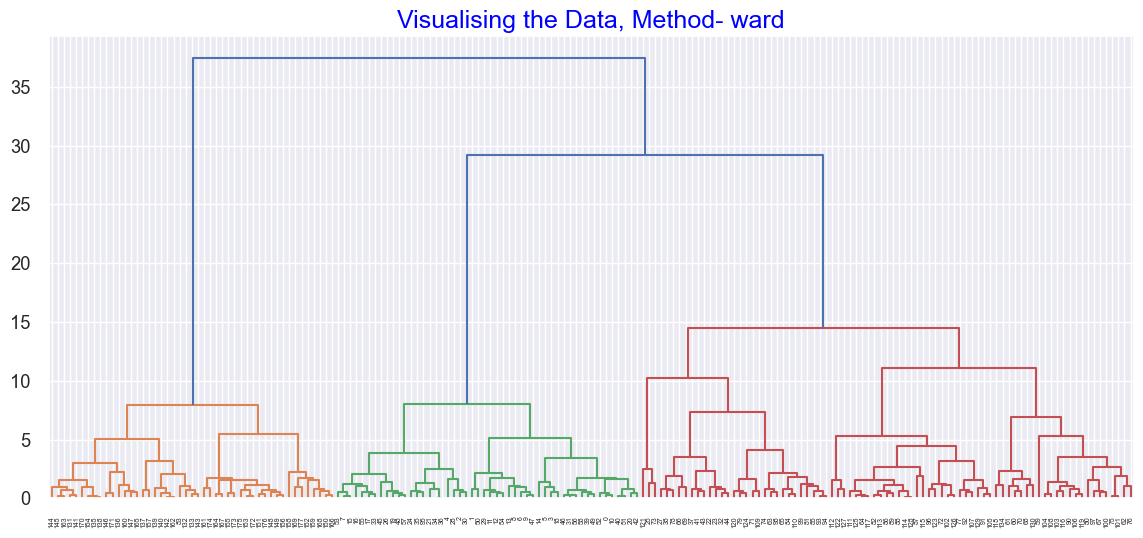

In [92]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6))  
    
    dict = {'fontsize':18,'fontweight' :16, 'color' : 'blue'} 
    plt.title('Visualising the Data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_std_wine, method = methods,optimal_ordering=False))

### Silhouette Score method for PCA Standard Scaled Data
###  Applying Different Linkages using Euclidean Method for distance Calculation

In [93]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_wine)
        silhouette_score1 = sil(pca_std_wine, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-", linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4187797009092467
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.3437278770757191
For n_clusters = 2 The average silhouette_score with linkage- average : 0.34854041549326337
For n_clusters = 2 The average silhouette_score with linkage- single : 0.34854041549326337

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4355352661667812
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.29482654329265306
For n_clusters = 3 The average silhouette_score with linkage- average : 0.4025547835526692
For n_clusters = 3 The average silhouette_score with linkage- single : 0.2578938247338432

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3739703958691178
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4171188330984905
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4689067590764211
Fo

###  Applying Different Linkages using Different Distance Methods

In [94]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages)
            hie_labels2 = hie_cluster2.fit_predict(pca_std_wine)
            silhouette_score2 = sil(pca_std_wine, hie_labels2)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score2)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.3437278770757191
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.22011950029106103
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.3437278770757191
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.22011950029106103
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.42467159593806836

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.34854041549326337
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.34854041549326337
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.34854041549326337
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.3

### Conclusion: Max score is with cluster numbers 4 in standard scaler transformation transformation.

* For n_clusters = 4 The average silhouette_score with linkage- complete and Affinity- l1 : 0.0739

* For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5006

* Heirarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. There are two types of hierarchical clustering: Agglomerative clustering Divisive clustering We now apply the Agglomerative clustering technique:Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined

### Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on Standard Scaled Data

In [95]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='l1')
y_pred_hie = agg_clustering.fit_predict(pca_std_wine)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [96]:
agg_clustering.n_clusters_

4

In [97]:
(sil(pca_std_wine, agg_clustering.labels_)*100).round(3)

47.312

### Putting Cluster lables into original dataset And analysis of the same

In [98]:
wine_df['Hierarchical_Labels'] = agg_clustering.labels_
wine_df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label,Hierarchical_Labels
ID,,,,,,,,,,,,,,,
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,1
2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,1
3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,1
4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,1
5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,1


In [99]:
wine_df.groupby('Hierarchical_Labels').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,
0,12.249516,1.972097,2.249839,20.193548,92.000000,2.182419,1.959194,0.370645,1.529516,2.937097,1.042516,2.740000,497.564516,0.032258
1,13.622615,1.927692,2.395692,16.955385,106.738462,2.821385,2.942154,0.283077,1.946923,5.378308,1.070308,3.124308,1072.276923,1.846154
2,13.157708,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000,1.000000
3,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.310000,1.123333,3.463333,760.000000,1.333333


### Plotting barplot using groupby method to get visualize how many row no. in each cluster

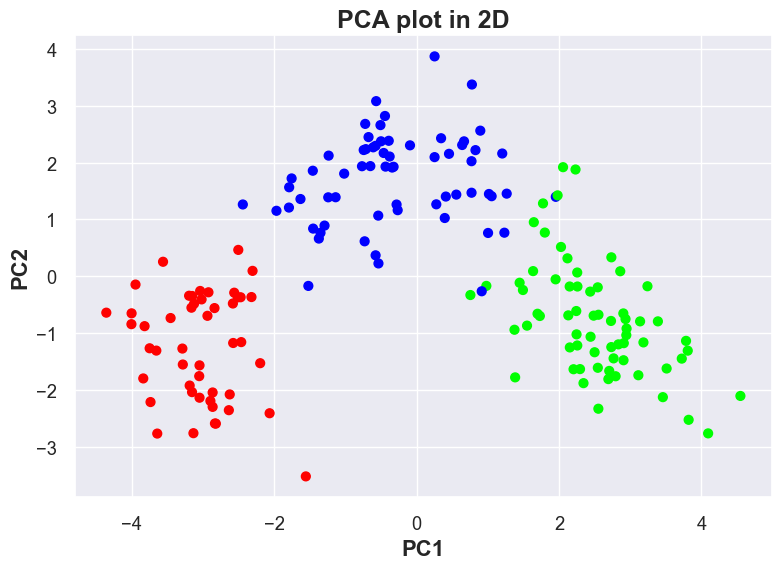

In [122]:
plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], c= wine_df['Hierarchical_Labels'], cmap="brg", s=40)

plt.title('PCA plot in 2D',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

### Group data by Clusters (Clusters=4)

In [125]:
display('After Applying Hierarchical Clustering on PCA Standard Scaled Dataset',wine_df.groupby('Hierarchical_Labels').agg(['mean']),'Original Classified Dataset',data.groupby('ID').agg(['mean']).head())

'After Applying Hierarchical Clustering on PCA Standard Scaled Dataset'

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,
0,12.226094,1.964219,2.244531,20.076563,93.890625,2.157969,1.987656,0.372812,1.565781,2.994687,1.042437,2.746875,503.125000,0.031250
1,13.157708,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000,1.000000
2,13.637424,1.933788,2.433485,17.465152,106.287879,2.874242,2.971970,0.282879,1.923030,5.347879,1.073636,3.144697,1070.106061,1.878788


'Original Classified Dataset'

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ID,,,,,,,,,,,,,
1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
2,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
3,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
4,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
5,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Observation:
As you can see the most of the data is in the first three clusters and very little amount of data in the last cluster so it must been that clusters are overlapping or may be that the data belonging to clusters may be wrong/incorrect.

###  Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on MinMaxScaled Data

In [101]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='l2')
y_pred_hie = agg_clustering.fit_predict(pca_norm_wine)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [102]:
agg_clustering.n_clusters_

3

In [103]:
(sil(pca_norm_wine, agg_clustering.labels_)*100).round(3)

51.639

### Putting Cluster lables into original dataset And analysis of the same

In [104]:
wine_df['Hierarchical_Labels'] = agg_clustering.labels_
wine_df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label,Hierarchical_Labels
ID,,,,,,,,,,,,,,,
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,2
2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2
3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,2
4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,2
5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,2


In [105]:
wine_df.groupby('Hierarchical_Labels').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,
0,12.226094,1.964219,2.244531,20.076563,93.890625,2.157969,1.987656,0.372812,1.565781,2.994687,1.042437,2.746875,503.125000,0.031250
1,13.157708,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000,1.000000
2,13.637424,1.933788,2.433485,17.465152,106.287879,2.874242,2.971970,0.282879,1.923030,5.347879,1.073636,3.144697,1070.106061,1.878788


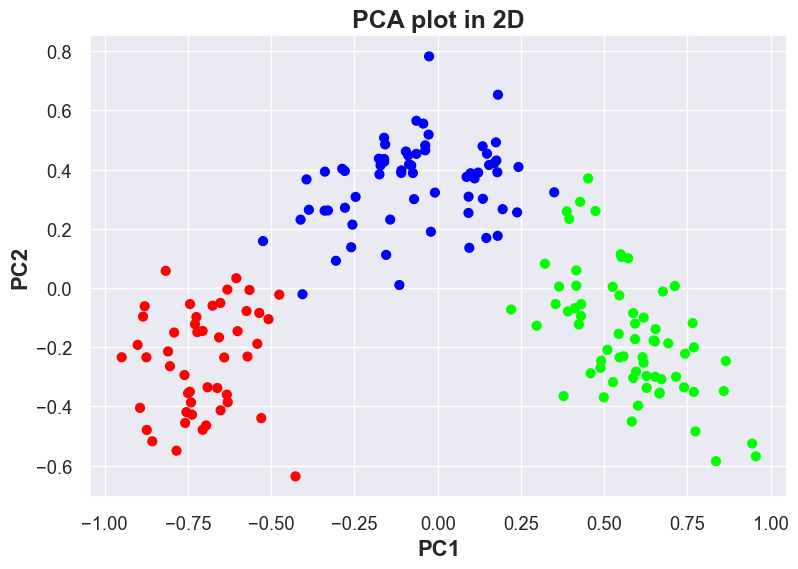

In [113]:
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_df['Hierarchical_Labels'], cmap="brg", s=40)

plt.title('PCA plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

### We can now clearly see the 3 number of clusters formed

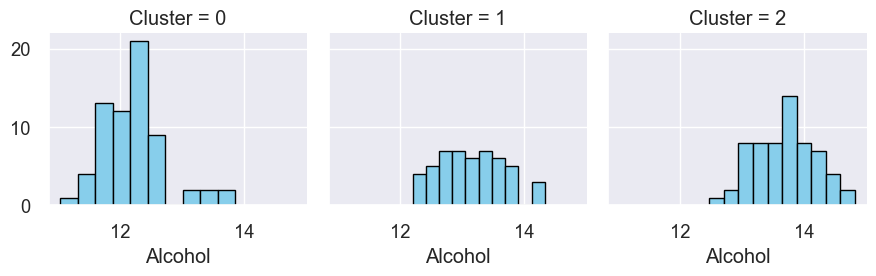

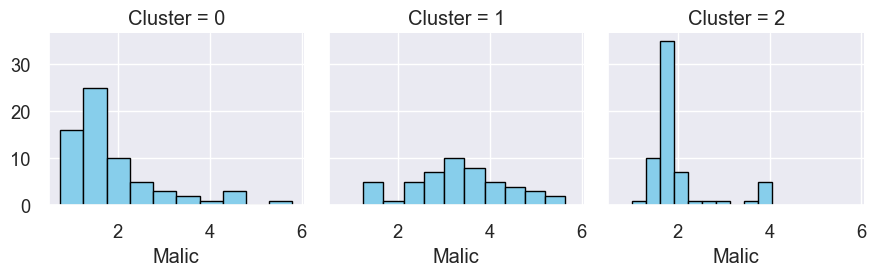

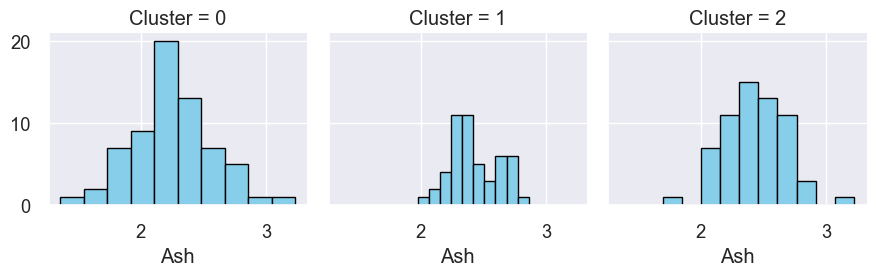

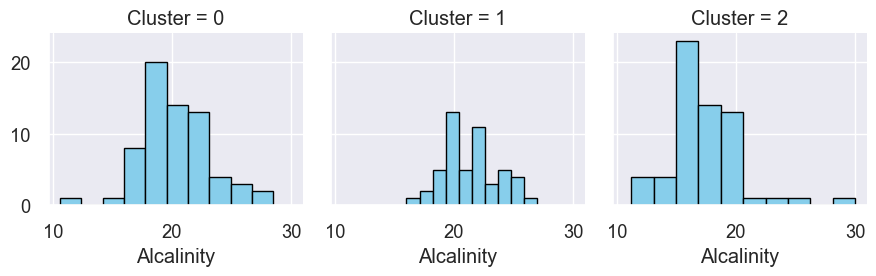

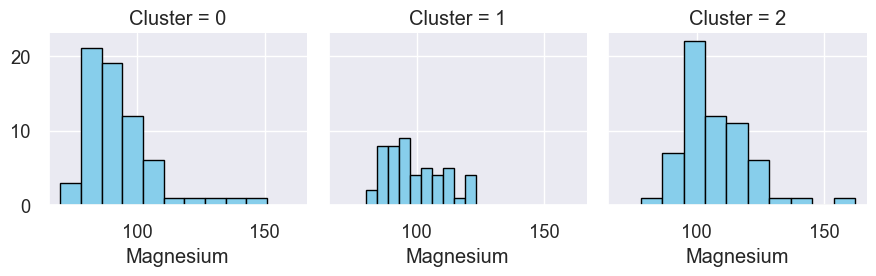

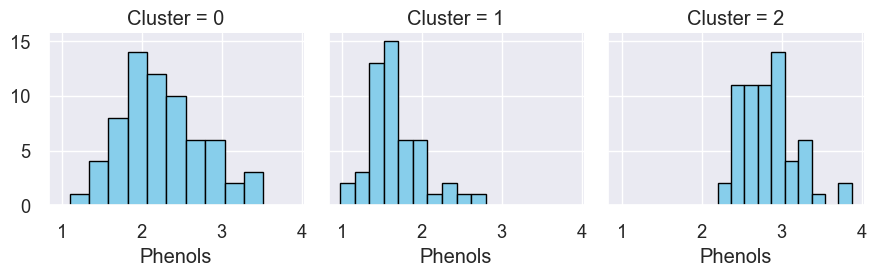

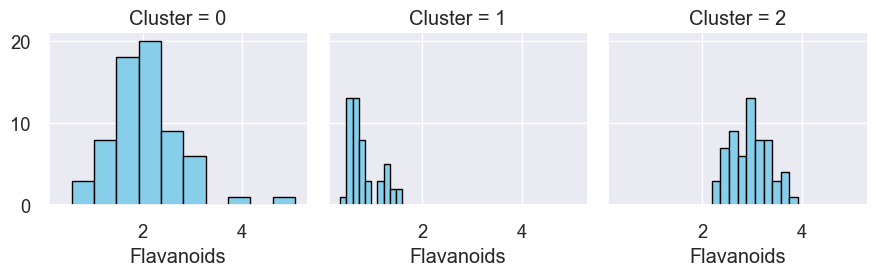

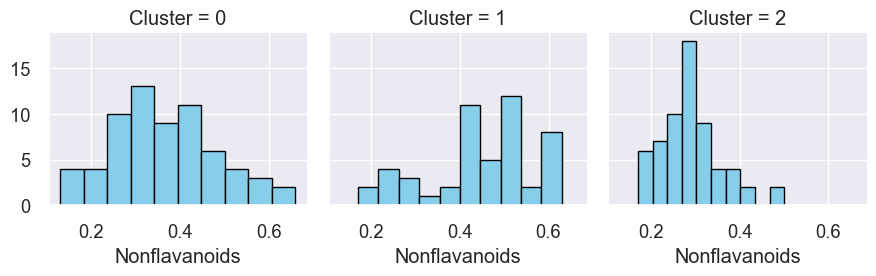

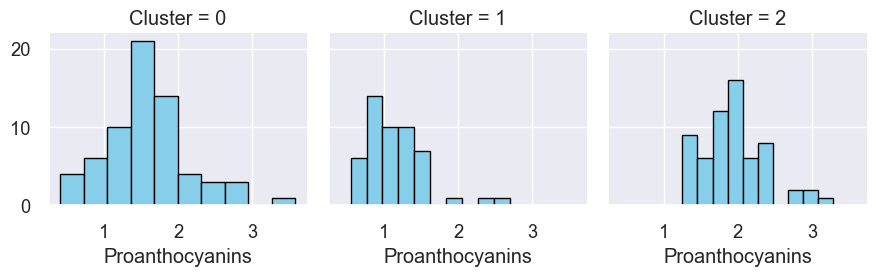

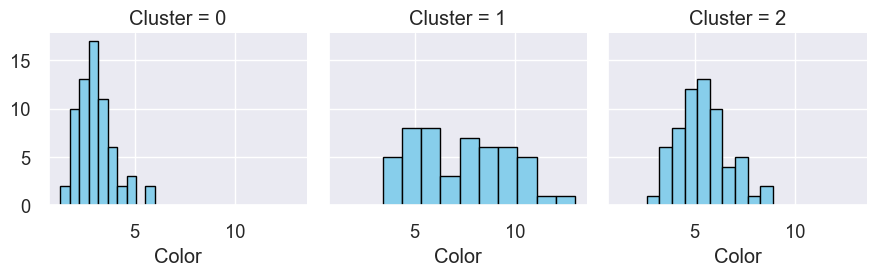

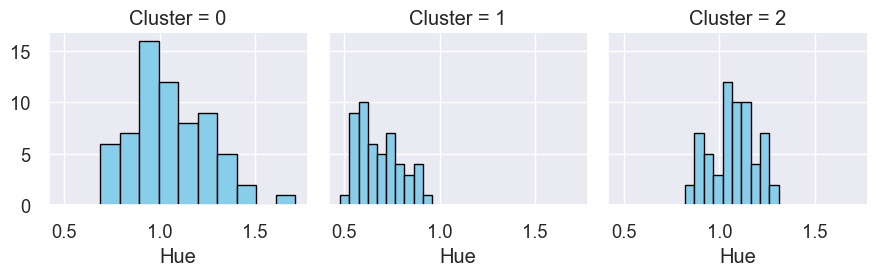

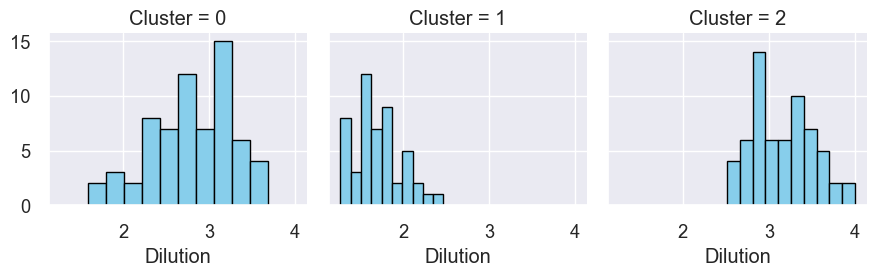

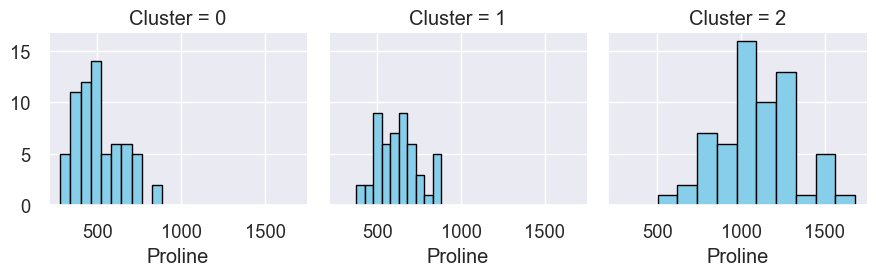

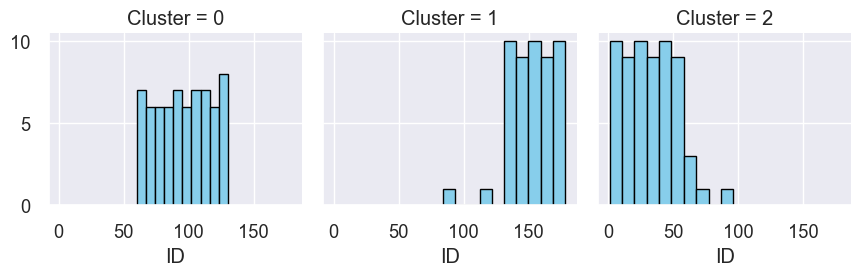

In [115]:
wine_df2 = data.copy()
wine_df2['Cluster'] = model_kmeans.labels_

aux = wine_df2.columns.tolist()
aux[0:len(aux)-1]

sns.set(style="darkgrid", rc={'figure.figsize':(15,10)}, font_scale=1.2)
for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(wine_df2, col= 'Cluster')
    grid.map(plt.hist, cluster, color="skyblue", lw=1, edgecolor="black")

### Sorting elements based on cluster label assigned and taking average for insights.

In [116]:
cluster1 = pd.DataFrame(wine_df2.loc[wine_df2.Cluster==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(wine_df2.loc[wine_df2.Cluster==1].mean(),columns= ['Cluster2_Avg'])
cluster3 = pd.DataFrame(wine_df2.loc[wine_df2.Cluster==2].mean(),columns= ['Cluster2_Avg'])
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

,Cluster1_Avg,Cluster2_Avg,Cluster2_Avg
Alcohol,12.233333,13.1440,13.701774
Malic,1.905000,3.3462,1.981129
Ash,2.251212,2.4256,2.441613
Alcalinity,20.218182,21.3300,17.245161
Magnesium,93.469697,98.6400,107.306452
Phenols,2.247273,1.6772,2.844355
Flavanoids,2.069091,0.8070,2.972581
Nonflavanoids,0.363485,0.4504,0.288710
Proanthocyanins,1.602727,1.1564,1.928710
Color,3.025758,7.2644,5.442258


### Group data by Clusters (K=3)

In [120]:
display('After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset',wine_df.groupby('Hierarchical_Labels').agg(['mean']),'Original Classified Dataset',data.groupby('ID').agg(['mean']).head())

'After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset'

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,
0,12.226094,1.964219,2.244531,20.076563,93.890625,2.157969,1.987656,0.372812,1.565781,2.994687,1.042437,2.746875,503.125000,0.031250
1,13.157708,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000,1.000000
2,13.637424,1.933788,2.433485,17.465152,106.287879,2.874242,2.971970,0.282879,1.923030,5.347879,1.073636,3.144697,1070.106061,1.878788


'Original Classified Dataset'

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ID,,,,,,,,,,,,,
1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
2,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
3,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
4,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
5,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Observation:
* The 3 clusters has been clustered but has a negliglable amount of difference compared to original classified Feature
* We have perfectly clustered the data into Three Types as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column

##  Conclusion:
* I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.
* Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.
* I have used & analyzed two clustering techniques here..i) KMeans ii) Hierarchical Clusterig
* By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building.